In [172]:
import DSGRN
from DSGRN import *
from tetrahedron import *
from tetrahedron_plus import *
from tetrahedron_plot_functions import *

27596782653696


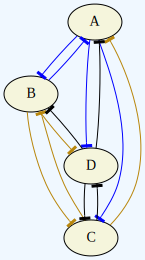

In [191]:
net_name = 'toggle_tetra'
#database = Database(f"/home/elizabeth/Desktop/Tetrahedron/{net_name}.db") 
network = DSGRN.Network(f"/home/elizabeth/Desktop/Tetrahedron/{net_name}.txt") 
network_location = f"/home/elizabeth/Desktop/Tetrahedron/{net_name}.txt"
parameter_graph = DSGRN.ParameterGraph(network)
print(parameter_graph.size())
DrawGraph(network)

In [197]:
n=10000
pi_results, bar_results0 = random_parameter_sample_mg_type(n,parameter_graph)
pi_results, bar_results1 = random_parameter_sample_mg_type(n,parameter_graph)
pi_results, bar_results2 = random_parameter_sample_mg_type(n,parameter_graph)
pi_results, bar_results3 = random_parameter_sample_mg_type(n,parameter_graph)

In [207]:
fp = 'FP { 2, 3, 0, 2 }'
fp[5], fp[8], fp[11], fp[14]

('2', '3', '0', '2')

In [214]:
m=3
data = bar_results3

bar_results_w_thresholding = {}
for pgi,fps in data.items():
    bar_results_w_thresholding[pgi] = []
    for fp in fps:
        if 'FP' in fp:
            new_fp = 'FP { '
            for i in [5, 8, 11]:
                if int(fp[i]) < m/2:
                    new_fp += '0, '
                else:
                    new_fp += '3, '
            if int(fp[14]) < m/2:
                new_fp += '0 }'
            else:
                new_fp += '3 }'
            bar_results_w_thresholding[pgi].append(new_fp)
        else:
            bar_results_w_thresholding[pgi].append(fp)
    
bar_results3_wt = bar_results_w_thresholding


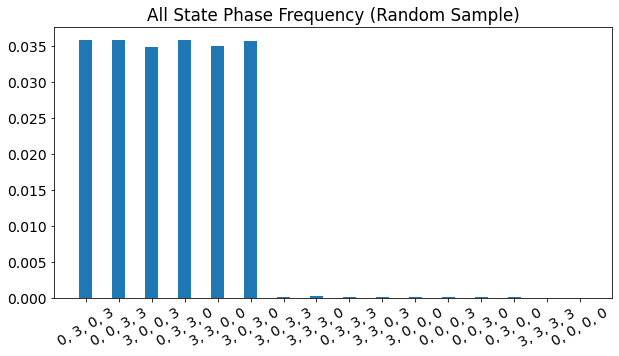

In [193]:
m = 3
all_states = [(0,m,0,m),(0,0,m,m),(m,0,0,m),(0,m,m,0),(m,m,0,0),(m,0,m,0),(m,0,m,m),(m,m,m,0),(0,m,m,m),(m,m,0,m),(m,0,0,0),(0,0,0,m),(0,0,m,0),(0,m,0,0),(m,m,m,m),(0,0,0,0)]
fig_title = "All State Phase Frequency (Random Sample)"
fig_name = f'{net_name}_All_State_Phase_Frequency_(Random_Sample)={n}'

all_state_phase_freq_bar_plot(bar_results, all_states, fig_title, fig_name)


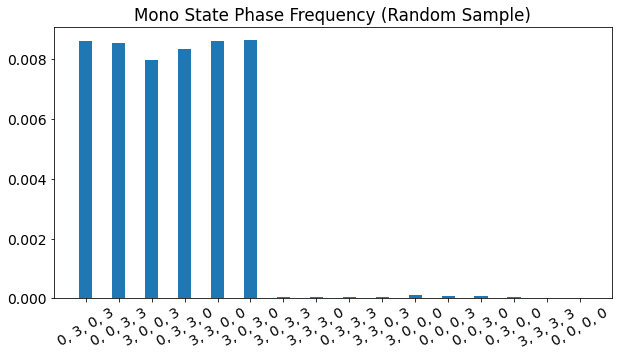

In [195]:
fig_title = "Mono State Phase Frequency (Random Sample)"
fig_name = f'{net_name}_Mono_State_Phase_Frequency_(Random Sample)={all}'

mono_state_phase_freq_bar_plot(bar_results, n, all_states, fig_title, fig_name)

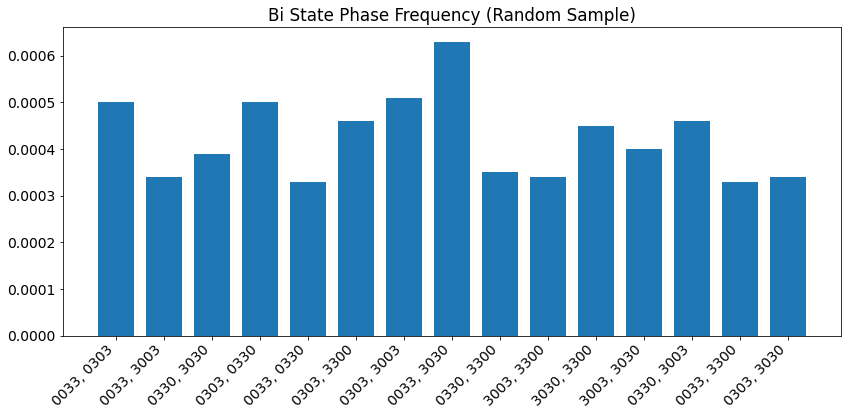

In [178]:
order = [((0, 0, m, m), (0, m, 0, m)), ((0, 0, m, m), (m, 0, 0, m)), ((0, m, m, 0), (m, 0, m, 0)), ((0, m, 0, m), (0, m, m, 0)), 
    ((0, 0, m, m), (0, m, m, 0)), ((0, m, 0, m), (m, m, 0, 0)), ((0, m, 0, m), (m, 0, 0, m)), ((0, 0, m, m), (m, 0, m, 0)),
    ((0, m, m, 0), (m, m, 0, 0)), ((m, 0, 0, m), (m, m, 0, 0)), ((m, 0, m, 0), (m, m, 0, 0)), ((m, 0, 0, m), (m, 0, m, 0)),
    ((0, m, m, 0), (m, 0, 0, m)), ((0, 0, m, m), (m, m, 0, 0)), ((0, m, 0, m), (m, 0, m, 0))]
    
fig_title = "Bi State Phase Frequency (Random Sample)"
fig_name = f'{net_name}_Bi_State_Phase_Frequency_(Random Sample)={all}'

bi_state_phase_freq_bar_plot(bar_results, n, all_states, order, fig_title, fig_name)

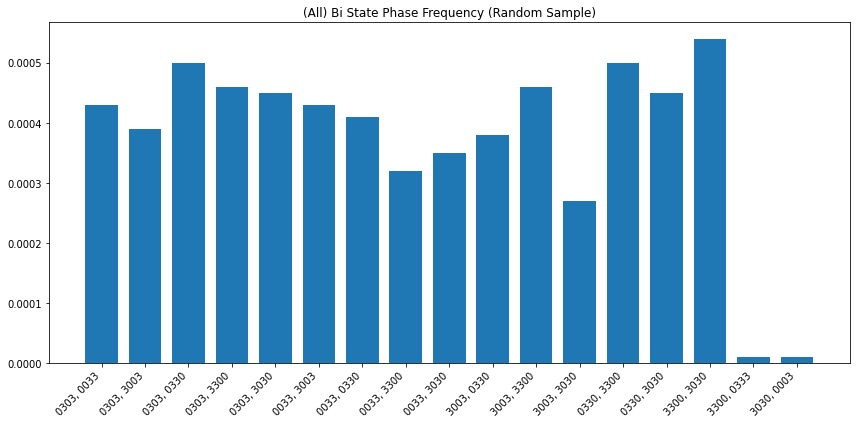

In [12]:
fig_title = "(All) Bi State Phase Frequency (Random Sample)"
fig_name = f'{net_name}_Bi_State_Phase_Frequency_(Random Sample)={all}'

bi_state_phase_freq_bar_plot(bar_results, n, all_states, None, fig_title, fig_name)

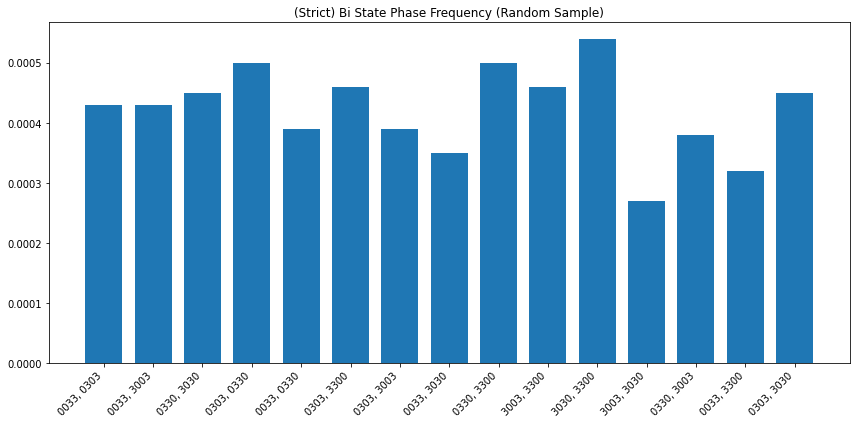

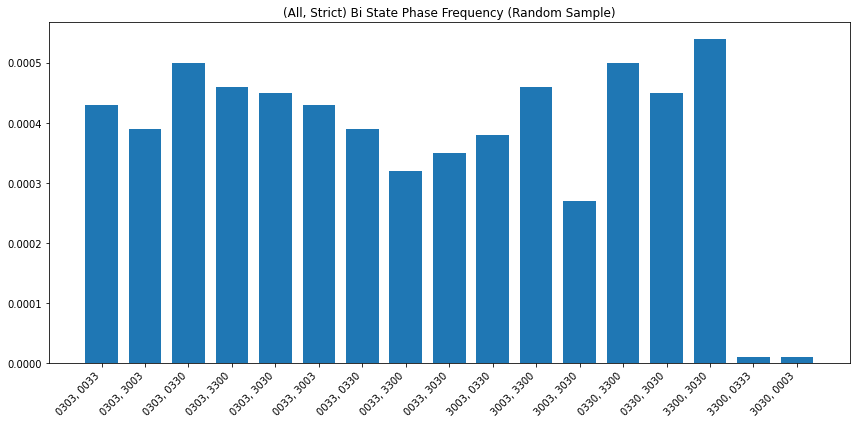

In [15]:
fig_title = "(Strict) Bi State Phase Frequency (Random Sample)"
fig_name = f'{net_name}_Strict_Bi_State_Phase_Frequency_(Random_Sample)={n}'

strict_bi_state_phase_freq_bar_plot(bar_results, n, all_states, order, fig_title, fig_name)

fig_title = "(All, Strict) Bi State Phase Frequency (Random Sample)"
fig_name = f'{net_name}_All_Strict_Bi_State_Phase_Frequency_(Random_Sample)={n}'

strict_bi_state_phase_freq_bar_plot(bar_results, n, all_states, None, fig_title, fig_name)

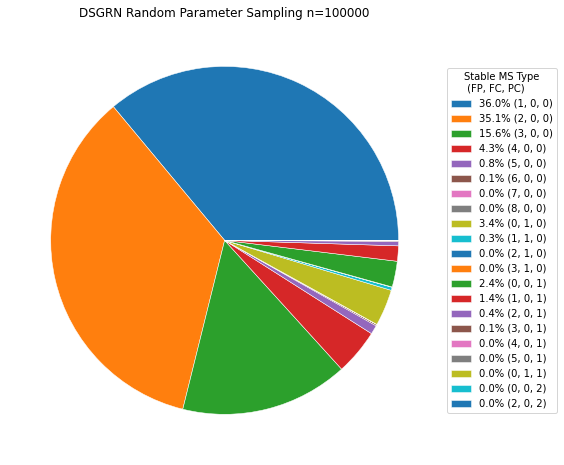

In [16]:
fig_title = f'DSGRN Random Parameter Sampling n={n}'
fig_name = f'{net_name}_DSGRN_Random_Parameter_Sampling_n={n}'

pi_chart_Stable_MS_type(pi_results, n, fig_title, fig_name)


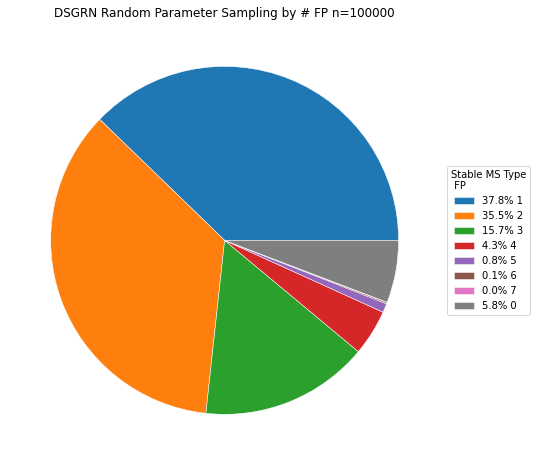

In [17]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))
label = []
data = []
for i in range(1,8):
    count = 0
    for key in pi_results:
        if key[0] == i:
            count += len(pi_results[key])
    data.append(count)
    perc = round((count/n)*100,1)
    label.append(str(perc) + '% ' +str(i))
count = 0
for key in pi_results:
    if key[0] == 0:
        count += len(pi_results[key])
data.append(count)
perc = round((count/n)*100,1)
label.append(str(perc) + '% ' +str(0))

wedges, texts = ax.pie(data)
for w in wedges:
    w.set_linewidth(.5)
    w.set_edgecolor('white')
    
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

ax.legend(wedges, label,
          title="Stable MS Type\n FP",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title(f'DSGRN Random Parameter Sampling by # FP n={n}')
plt.savefig(f'{net_name}_DSGRN_Random_Parameter_Sampling_by_FP_n={n}', dpi=300, facecolor='white')
plt.show()

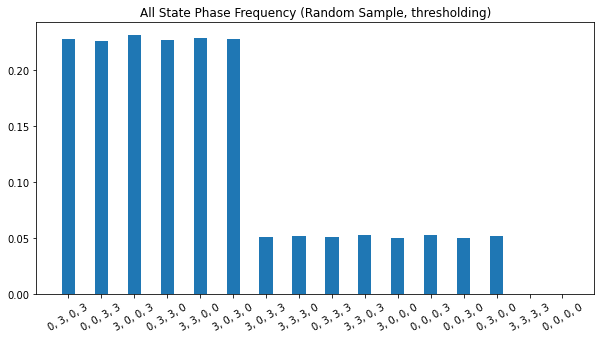

In [59]:
fig_title = "All State Phase Frequency (Random Sample, thresholding)"
fig_name = f'{net_name}_All_State_Phase_Frequency_(Random_Sample_thresholding)={n}'

all_state_phase_freq_bar_plot_w_thresholding(bar_results, 1.5, all_states, fig_title, fig_name)

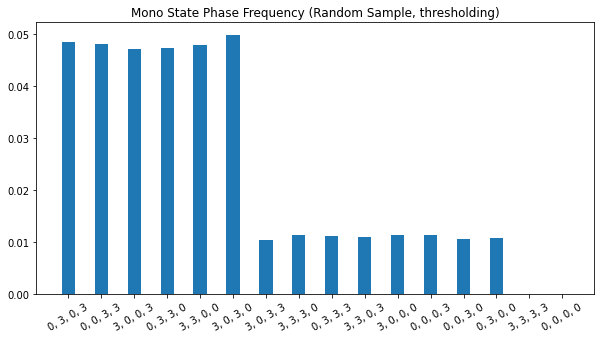

In [61]:
fig_title = "Mono State Phase Frequency (Random Sample, thresholding)"
fig_name = f'{net_name}_mono_State_Phase_Frequency_(Random_Sample_thresholding)={n}'

mono_state_phase_f b  b=-req_bar_plot_w_thresholding(bar_results, 100000, 1.5, all_states, fig_title, fig_name)

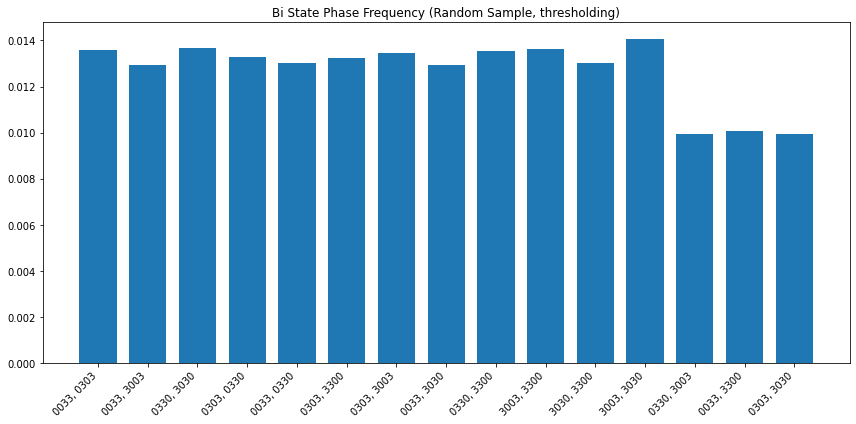

In [62]:
fig_title = "Bi State Phase Frequency (Random Sample, thresholding)"
fig_name = f'{net_name}_bi_State_Phase_Frequency_(Random_Sample_thresholding)={n}'

bi_state_phase_freq_bar_plot_w_thresholding(bar_results, 100000, 1.5, all_states, order, fig_title, fig_name)

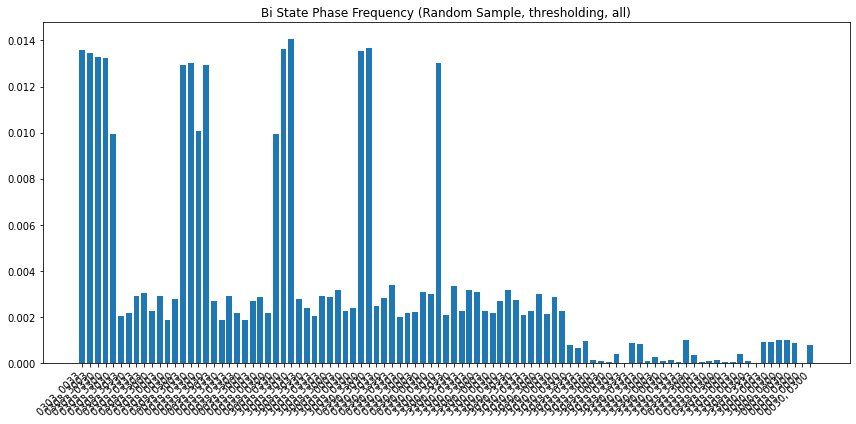

In [63]:
fig_title = "Bi State Phase Frequency (Random Sample, thresholding, all)"
fig_name = f'{net_name}_bi_State_Phase_Frequency_(Random_Sample_thresholding_all)={n}'

bi_state_phase_freq_bar_plot_w_thresholding(bar_results, 100000, 1.5, all_states, None, fig_title, fig_name)

In [4]:
strict_Bool_MS = get_boolean_stable_Morse_sets(network_location) #keys: Hexcodes, Values: stable boolean sets

Number of strict Boolean parameters: 6561


In [5]:
strict_Bool_results = stable_mg_type_counts_for_strict_Boolean(network_location)

Number of strict Boolean parameters: 6561


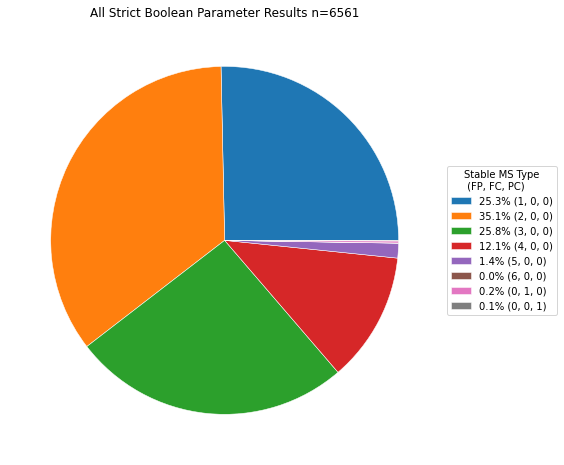

In [11]:
n = 6561
fig_title = f'All Strict Boolean Parameter Results n={n}'
fig_name = f'{net_name}_All_Strict_Boolean_Parameter_Results_n={n}'
pi_chart_Stable_MS_type(strict_Bool_results, n, fig_title, fig_name)

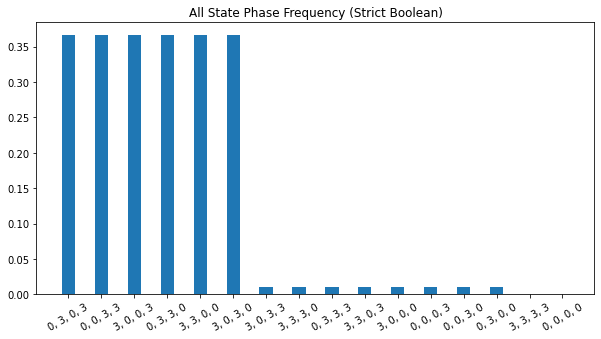

In [12]:
fig_title = "All State Phase Frequency (Strict Boolean)"
fig_name = f'{net_name}_All_State_Phase_Frequency_(Strict_Boolean)={n}'

all_state_phase_freq_bar_plot(strict_Bool_MS, all_states, fig_title, fig_name)

In [189]:
def get_inequalities_for_FPs(ssd,fp_list,network,net_name):
    # put desired fps in canonical order
    fp_list = sorted(fp_list)
    # load results (string of hexcodes : list of FPs)
    #ssd = json.load(open(stable_set_file))
    all_hexes = []
    for hexcodes,fps in ssd.items():
        fps = sorted(fps) 
        if fps == fp_list:
            all_hexes.append(hexcodes.split())
    # network string to DSGRN network
    net = DSGRN.Network(network)
    # create default order for parameter construction
    orders = [list(range(len(net.outputs(i)))) for i in range(net.size())]
    # get all the parameter inequalities with the correct dynamics
    all_inequalities = []
    for hxcds in all_hexes:
        all_inequalities.append(get_parameter_inequalities(net,hxcds,orders))
    #output = {"(Multistable) Fixed Points" : fp_list, "Parameter inequalities" : all_inequalities}
    #json.dump(output,open("results/{}_inequalities.json".format(net_name),"w"))
    return all_inequalities

def get_inequalities_for_FPs_DSGRN(ssd,fp_list,network,net_name):

    pg = DSGRN.ParameterGraph(network)
    # put desired fps in canonical order
    fp_list = sorted(fp_list)
    # load results (string of hexcodes : list of FPs)
    #ssd = json.load(open(stable_set_file))
    all_inequalities = []
    for pgi,fps in ssd.items():
        fps = sorted(fps) 
        if fps == fp_list:
            parameter = pg.parameter(pgi)
            all_inequalities.append(parameter.partialorders('T'))
    return all_inequalities
    
def get_parameter_inequalities(network,hexcodes,orders):
    param = pb.construct_parameter(network,hexcodes,orders)
    return param.partialorders('T')

In [215]:
get_inequalities_for_FPs_DSGRN(bar_results0_wt,['FP { 0, 0, 0, 3 }'],network,net_name)

['A : (p0, p1, p2, p3, p4, T[A->C], p6, T[A->D], p5, T[A->B], p7)\nB : (p0, p1, p2, p4, p5, T[B->C], p3, T[B->A], p6, T[B->D], p7)\nC : (p0, p1, p2, p3, p4, T[C->B], p6, T[C->A], p5, T[C->D], p7)\nD : (p0, T[D->A], p1, p2, T[D->C], p3, T[D->B], p4, p5, p6, p7)',
 'A : (p0, T[A->C], p1, p2, p3, T[A->B], p4, p6, T[A->D], p5, p7)\nB : (p0, p1, T[B->C], p2, p3, T[B->A], p4, T[B->D], p5, p6, p7)\nC : (p0, p1, p2, p4, p6, T[C->D], p3, T[C->B], p5, T[C->A], p7)\nD : (p0, p2, p4, T[D->C], T[D->A], T[D->B], p1, p3, p5, p6, p7)',
 'A : (p0, p4, T[A->C], p2, p6, T[A->D], p1, T[A->B], p3, p5, p7)\nB : (p0, p1, p2, T[B->A], p3, p4, T[B->D], p5, T[B->C], p6, p7)\nC : (p0, p2, p4, T[C->A], T[C->B], T[C->D], p1, p3, p5, p6, p7)\nD : (p0, T[D->C], p2, p4, p6, T[D->B], p1, p5, T[D->A], p3, p7)',
 'A : (p0, p2, p4, T[A->C], p1, p3, p6, T[A->B], p5, T[A->D], p7)\nB : (p0, p1, p2, p4, T[B->C], p3, T[B->D], p5, p6, T[B->A], p7)\nC : (p0, p2, p4, T[C->B], p6, T[C->D], p1, p3, p5, T[C->A], p7)\nD : (p0, T[D->

In [ ]:
data_by_fp = {}
Done = []
for fp1 in all_states:
    for fp2 in all_states:
        if fp1 != fp2:
            if (fp1, fp2) not in Done:
                Done.append((fp1, fp2))
                Done.append((fp2, fp1))

                data_by_fp[(fp1,fp2)] = {'G':[], 'L':[], 'E':[]}
                fp1_string = 'FP { ' + str(fp1[0]) + ', ' + str(fp1[1]) + ', ' + str(fp1[2]) + ', ' + str(fp1[3]) + ' }'
                fp2_string = 'FP { ' + str(fp2[0]) + ', ' + str(fp2[1]) + ', ' + str(fp2[2]) + ', ' + str(fp2[3]) + ' }'
                data_labels = []
                for pair in pairs:
                    node1 = pair[0] + ' :'
                    t1 = 'T['+pair[0]+'->'+pair[1]+']'
                    node2 = pair[1] + ' :'
                    t2 = 'T['+pair[1]+'->'+pair[0]+']'

                    data_labels.append(pair[0]+pair[1])
                    data_labels.append(pair[0]+pair[1]+'e')
                    data_labels.append(pair[1]+pair[0])

                    ineq = get_inequalities_for_FPs(strict_Bool_MS,[fp1_string, fp2_string],network_location,net_name)
                    if ineq != []:

                        node1_greater = 0
                        node2_greater = 0
                        equal = 0
                        for i in ineq:
                        # print(i[i.find(node1):i.find(t1)])
                            u1 = i[i.find(node1):i.find(t1)].count('p')
                            #print(i[i.find(node2):i.find(t2)])
                            u2 = i[i.find(node2):i.find(t2)].count('p')
                            if u1 > u2:
                                node1_greater += 1
                            if u1 == u2:
                                equal += 1
                            if u1 < u2:
                                node2_greater += 1
                        #print(pair, fp, node1_greater, equal, node2_greater, len(ineq))
                        data_by_fp[(fp1, fp2)]['G'].append(node1_greater)
                        data_by_fp[(fp1, fp2)]['L'].append(node2_greater)
                        data_by_fp[(fp1, fp2)]['E'].append(equal)
data_by_fp

In [247]:

data_sets = [bar_results0_wt, bar_results1_wt, bar_results2_wt, bar_results3_wt]

data_by_fp = {}

Done = []
for fp1 in all_states:
    for fp2 in all_states:
        if fp1 != fp2:
            if (fp1, fp2) not in Done:
                Done.append((fp1, fp2))
                Done.append((fp2, fp1))
                data_by_fp[(fp1,fp2)] = {0:{'G':[], 'L':[], 'E':[]}, 1:{'G':[], 'L':[], 'E':[]}, 2:{'G':[], 'L':[], 'E':[]}, 3:{'G':[], 'L':[], 'E':[]}}
                fp1_string = 'FP { ' + str(fp1[0]) + ', ' + str(fp1[1]) + ', ' + str(fp1[2]) + ', ' + str(fp1[3]) + ' }'
                fp2_string = 'FP { ' + str(fp2[0]) + ', ' + str(fp2[1]) + ', ' + str(fp2[2]) + ', ' + str(fp2[3]) + ' }'

                for s in range(len(data_sets)):
                    data_set = data_sets[s]
                    data_labels = []
                    for pair in pairs:
                        node1 = pair[0] + ' :'
                        t1 = 'T['+pair[0]+'->'+pair[1]+']'
                        node2 = pair[1] + ' :'
                        t2 = 'T['+pair[1]+'->'+pair[0]+']'

                        data_labels.append(pair[0]+pair[1])
                        data_labels.append(pair[0]+pair[1]+'e')
                        data_labels.append(pair[1]+pair[0])

                        ineq = get_inequalities_for_FPs_DSGRN(data_set,[fp1_string, fp2_string],network,net_name)
                        if ineq != []:

                            node1_greater = 0
                            node2_greater = 0
                            equal = 0
                            for i in ineq:
                            # print(i[i.find(node1):i.find(t1)])
                                u1 = i[i.find(node1):i.find(t1)].count('p')
                                #print(i[i.find(node2):i.find(t2)])
                                u2 = i[i.find(node2):i.find(t2)].count('p')
                                if u1 > u2:
                                    node1_greater += 1
                                if u1 == u2:
                                    equal += 1
                                if u1 < u2:
                                    node2_greater += 1
                            #print(pair, fp, node1_greater, equal, node2_greater, len(ineq))
                            data_by_fp[(fp1, fp2)][s]['G'].append(node1_greater)
                            data_by_fp[(fp1, fp2)][s]['L'].append(node2_greater)
                            data_by_fp[(fp1, fp2)][s]['E'].append(equal)
data_by_fp          

{((0, 3, 0, 3),
  (0, 0, 3, 3)): {0: {'G': [78, 79, 100, 60, 86, 82],
   'L': [29, 35, 13, 47, 26, 25],
   'E': [22, 15, 16, 22, 17, 22]}, 1: {'G': [82, 75, 103, 46, 77, 70],
   'L': [24, 36, 11, 55, 30, 31],
   'E': [18, 13, 10, 23, 17, 23]}, 2: {'G': [85, 94, 107, 55, 90, 90],
   'L': [33, 31, 16, 58, 35, 42],
   'E': [26, 19, 21, 31, 19, 12]}, 3: {'G': [92, 101, 117, 62, 90, 92],
   'L': [36, 27, 11, 59, 32, 35],
   'E': [18, 18, 18, 25, 24, 19]}},
 ((0, 3, 0, 3),
  (3, 0, 0, 3)): {0: {'G': [55, 31, 83, 28, 86, 110],
   'L': [49, 89, 32, 81, 27, 9],
   'E': [27, 11, 16, 22, 18, 12]}, 1: {'G': [63, 26, 89, 30, 81, 112],
   'L': [49, 90, 34, 90, 39, 11],
   'E': [23, 19, 12, 15, 15, 12]}, 2: {'G': [43, 29, 72, 25, 78, 94],
   'L': [59, 72, 35, 72, 29, 10],
   'E': [15, 16, 10, 20, 10, 13]}, 3: {'G': [57, 42, 90, 29, 89, 114],
   'L': [53, 76, 30, 84, 28, 10],
   'E': [27, 19, 17, 24, 20, 13]}},
 ((0, 3, 0, 3),
  (0, 3, 3, 0)): {0: {'G': [96, 83, 74, 32, 27, 57],
   'L': [13, 31, 33, 8

In [250]:
import statistics as stat

avg_data = {}
for fp in data_by_fp:
    avg_data[fp] = {'G':[], 'E':[], 'L':[], 'errG':[], 'errE':[], 'errL':[]}
    for group in ['G', 'E', 'L']:
        for index in range(6):
            lst = [data_by_fp[fp][i][group][index] for i in range(4) if data_by_fp[fp][i][group] != []]
            if len(lst) > 1:
                avg = sum(lst)/4
                sd = stat.stdev(lst)
                avg_data[fp][group].append(avg)
                avg_data[fp]['err'+group].append(sd)
avg_data

{((0, 3, 0, 3),
  (0, 0, 3, 3)): {'G': [84.25, 87.25, 106.75, 55.75, 85.75, 83.5], 'E': [21.0,
   16.25,
   16.25,
   25.25,
   19.25,
   19.0], 'L': [30.5,
   32.25,
   12.75,
   54.75,
   30.75,
   33.25], 'errG': [5.909032633745278, 12.284814474246922, 7.41057802513857, 7.135591542869215, 6.13052471924984, 9.983319421247959], 'errE': [3.8297084310253524,
   2.753785273643051,
   4.645786621588784,
   4.031128874149275,
   3.304037933599835,
   4.96655480858378], 'errL': [5.196152422706632,
   4.112987559751022,
   2.362907813126304,
   5.439056290693573,
   3.774917217635375,
   7.135591542869215]},
 ((0, 3, 0, 3), (3, 0, 0, 3)): {'G': [54.5, 32.0, 83.5, 28.0, 83.5, 107.5],
  'E': [23.0, 16.25, 13.75, 20.25, 15.75, 12.5],
  'L': [52.5, 81.75, 32.75, 81.75, 30.75, 10.0],
  'errG': [8.386497083606082,
   6.97614984548545,
   8.266397845091497,
   2.160246899469287,
   4.932882862316247,
   9.146948489341495],
  'errE': [5.656854249492381,
   3.774917217635375,
   3.304037933599835,
  

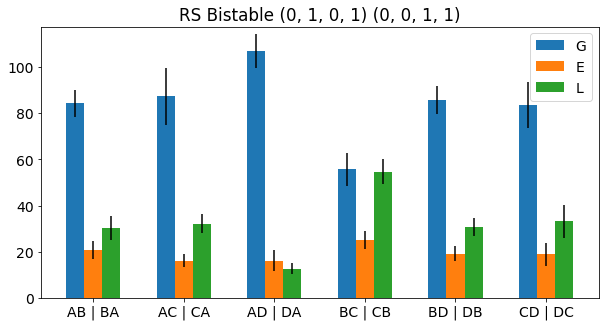

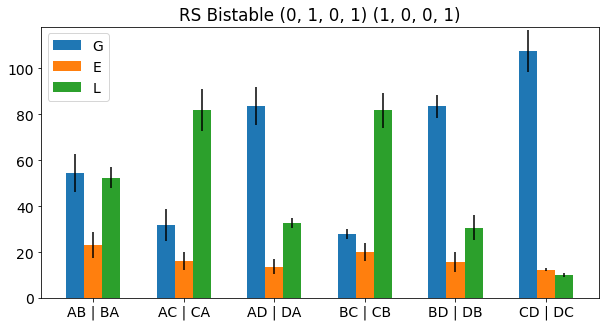

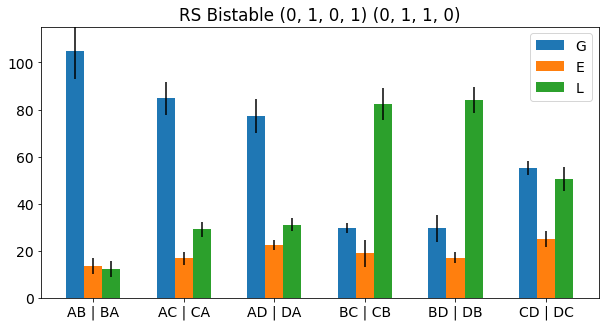

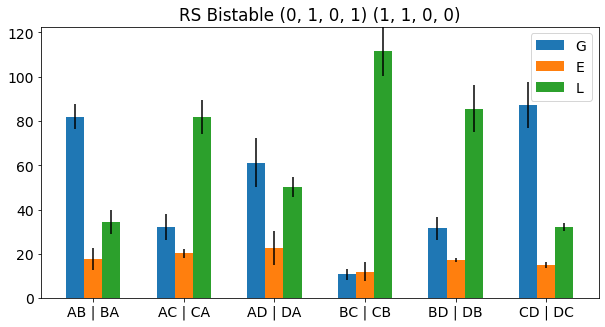

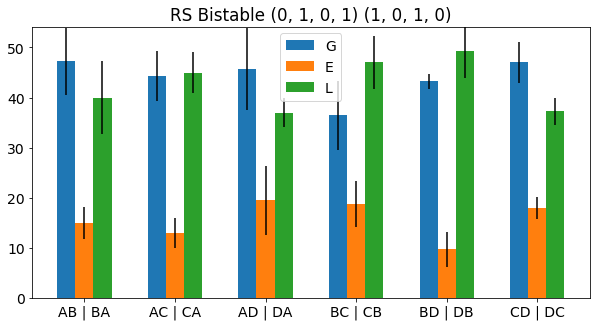

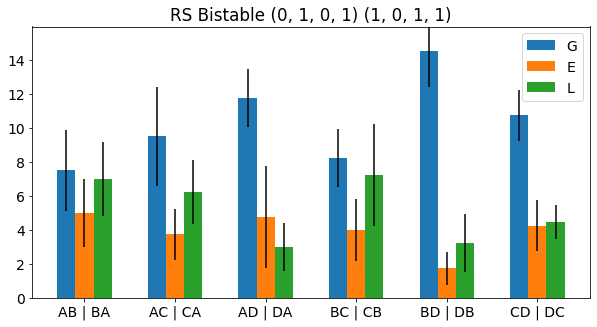

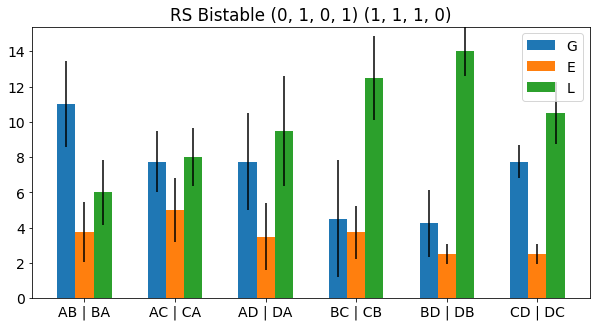

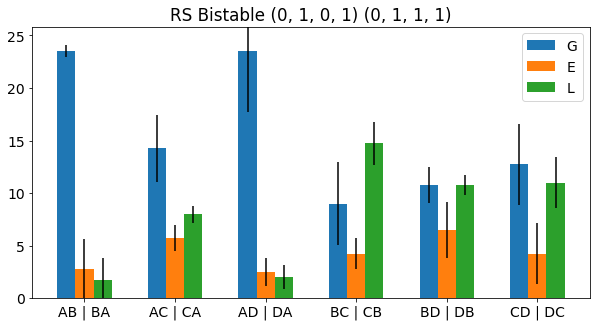

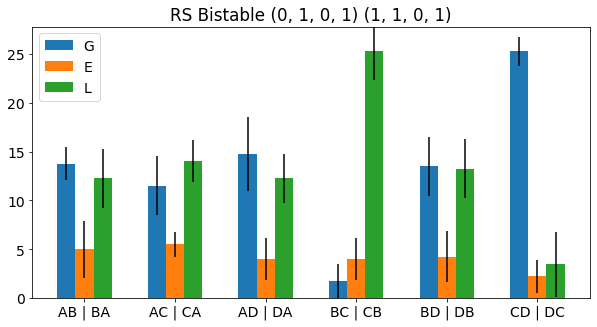

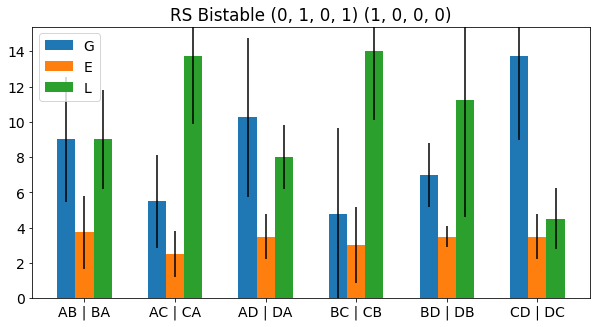

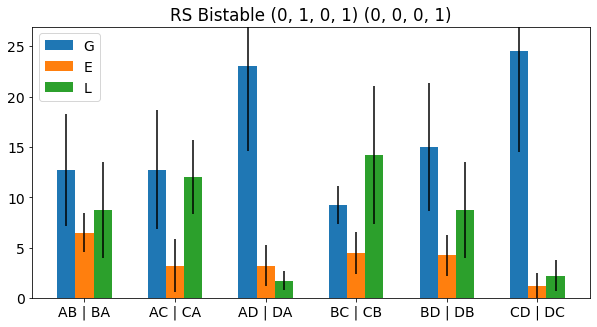

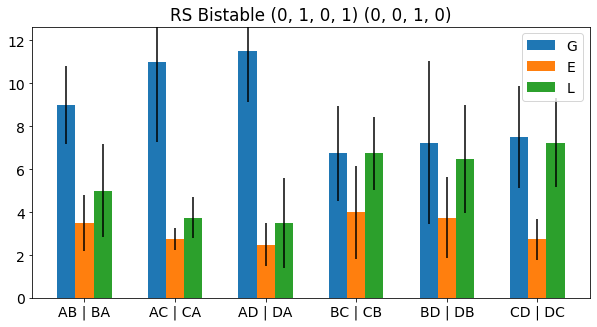

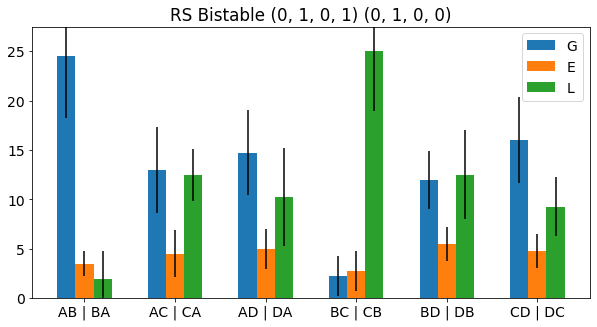

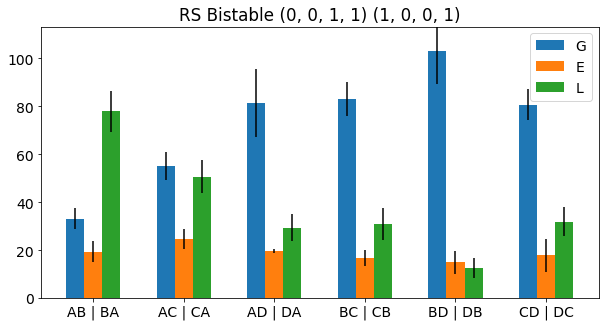

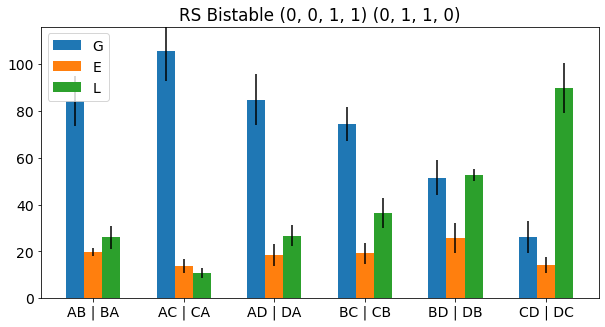

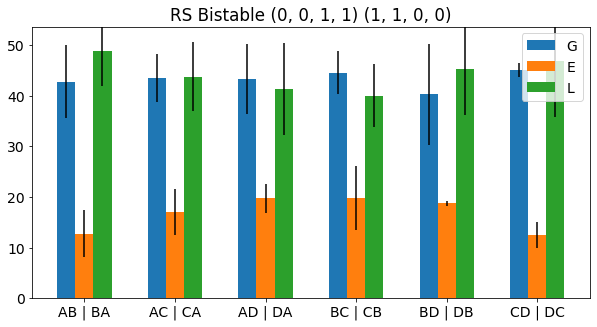

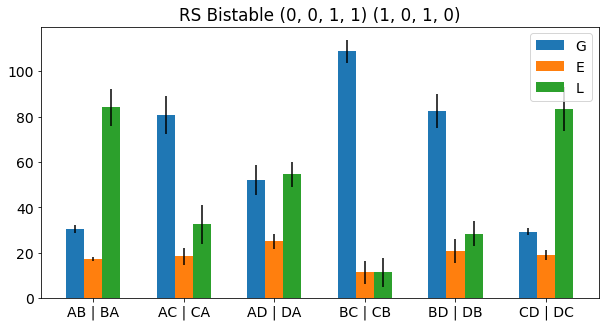

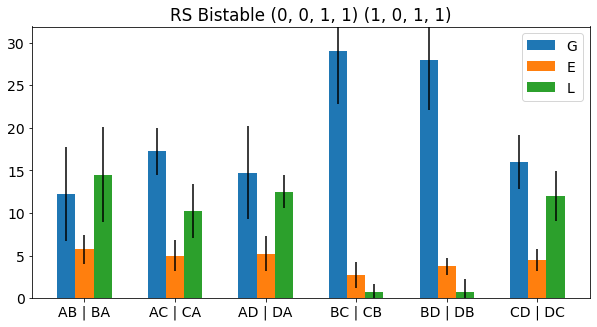

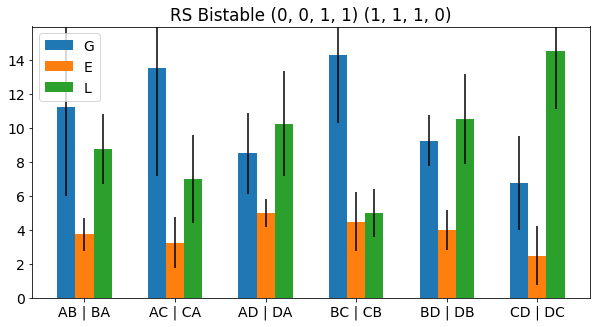

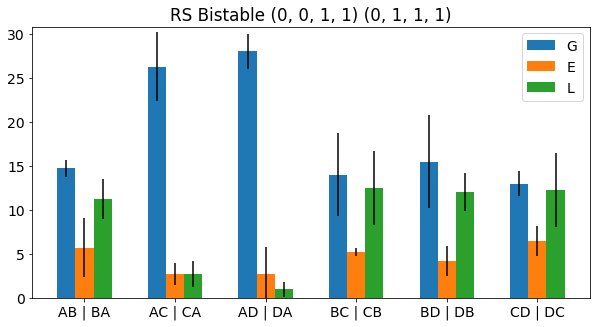

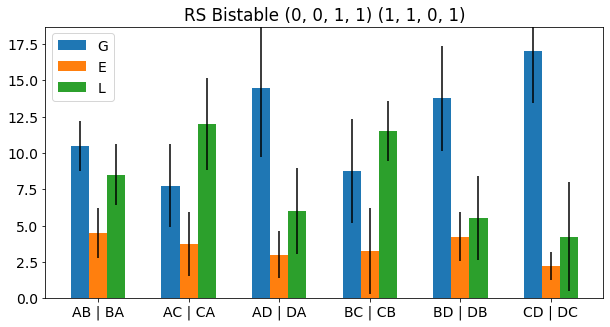

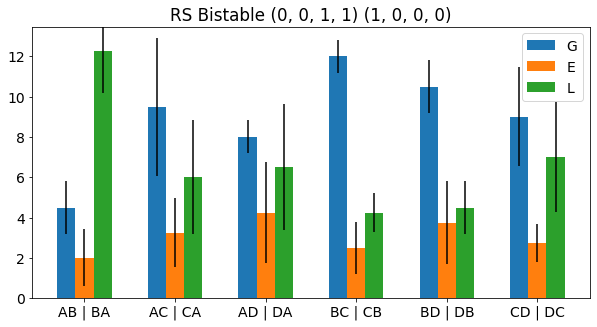

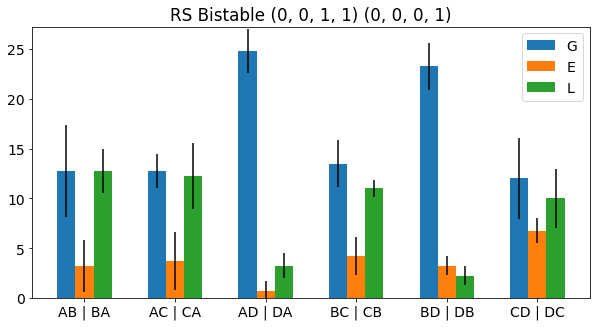

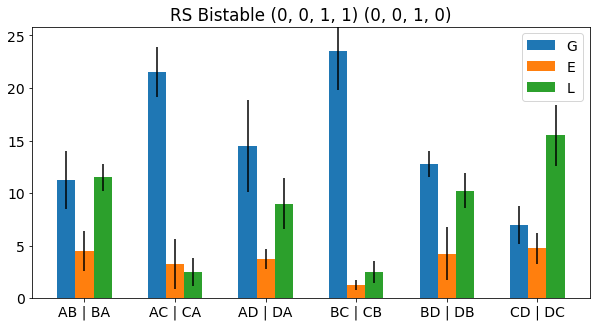

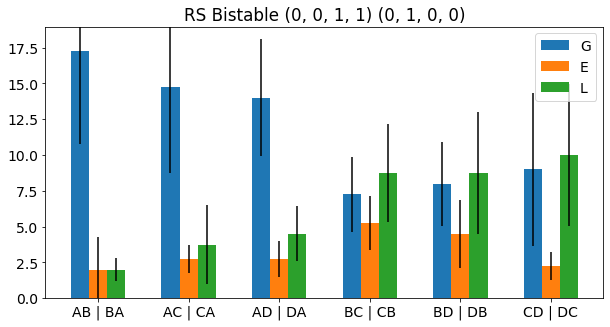

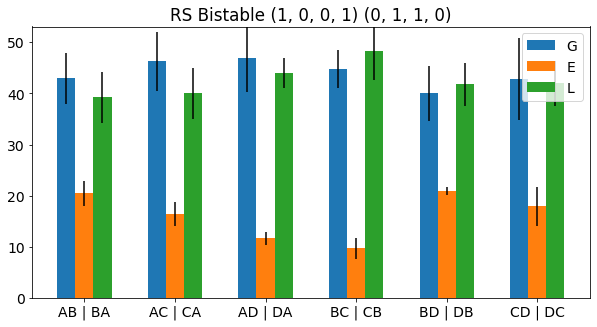

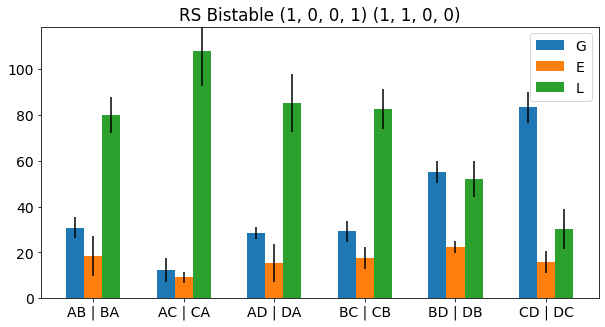

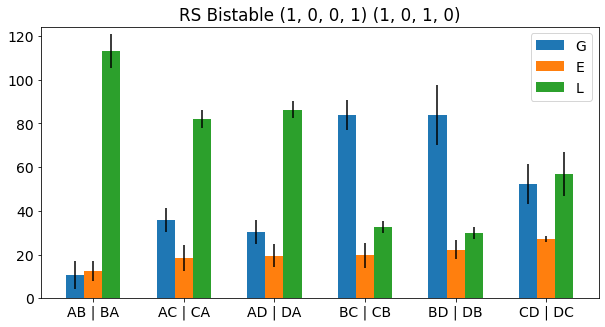

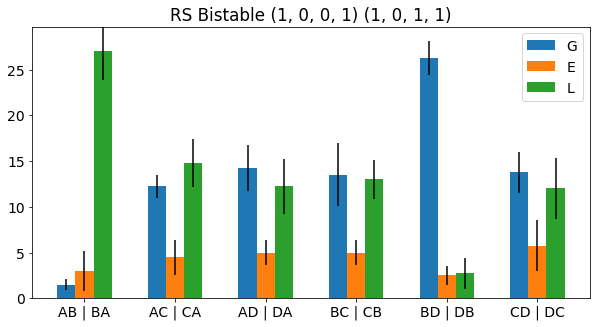

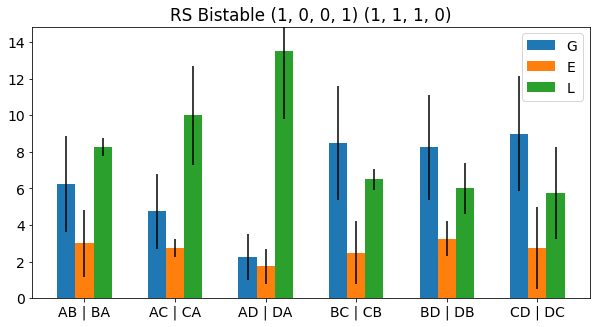

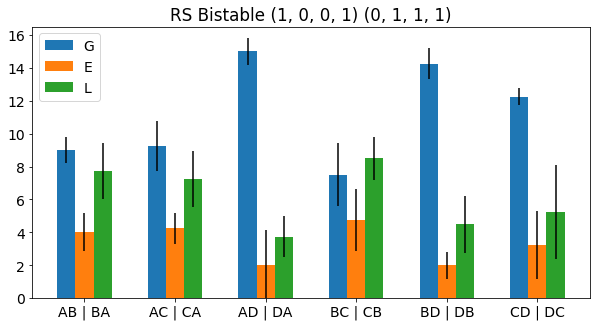

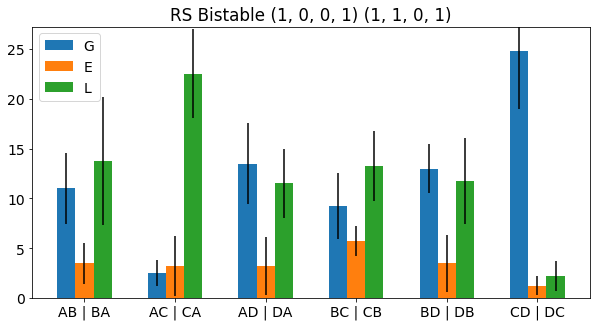

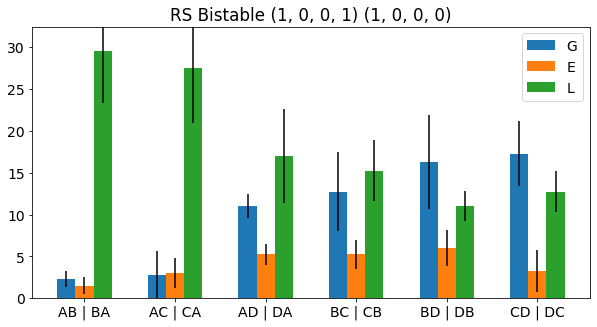

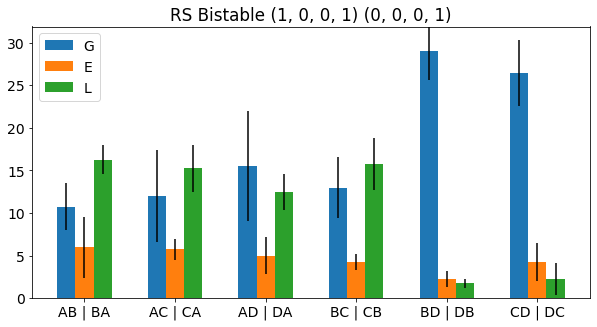

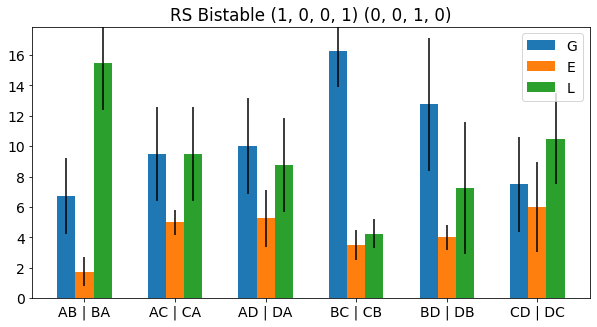

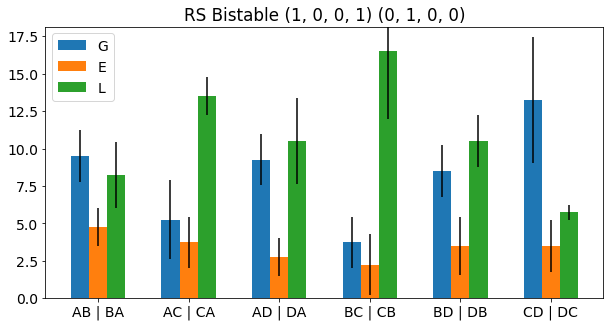

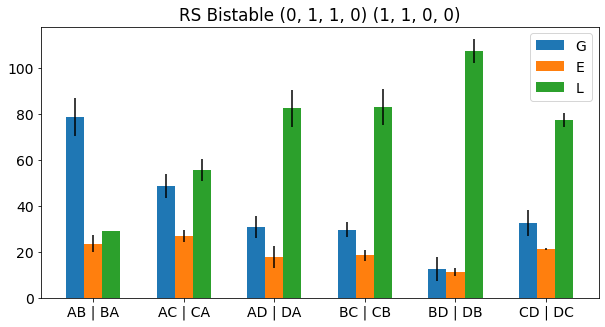

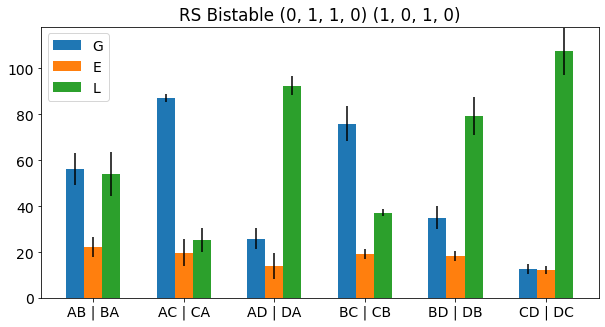

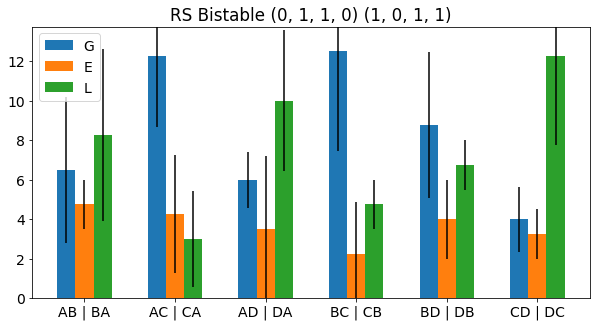

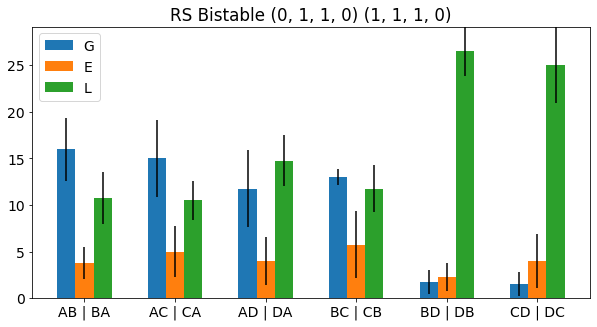

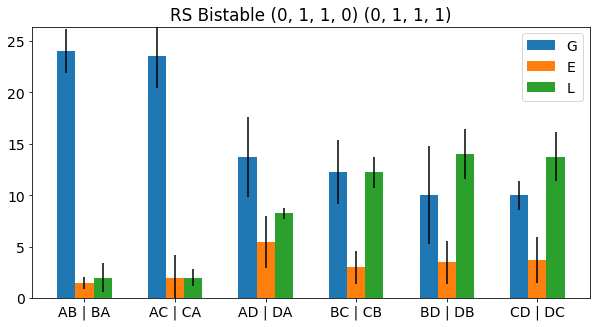

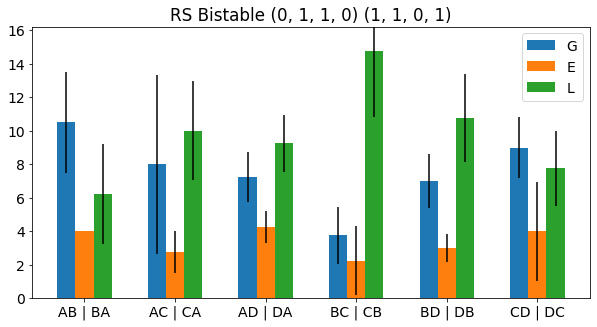

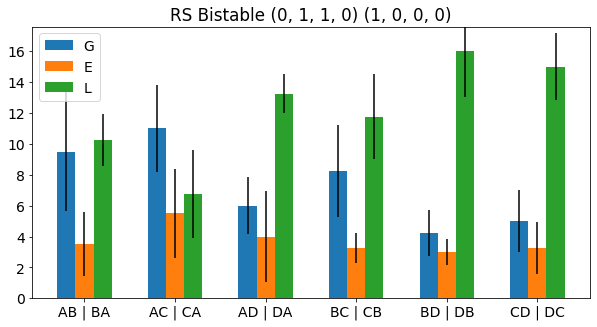

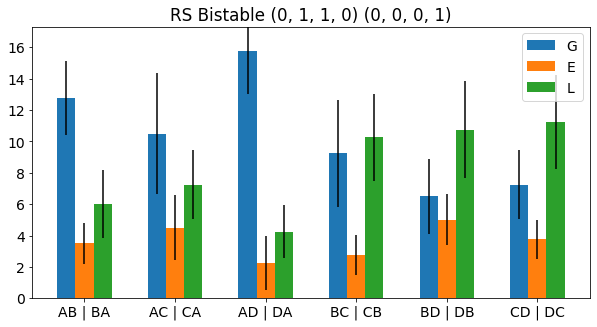

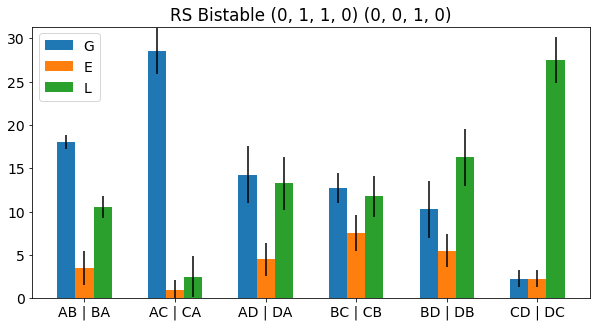

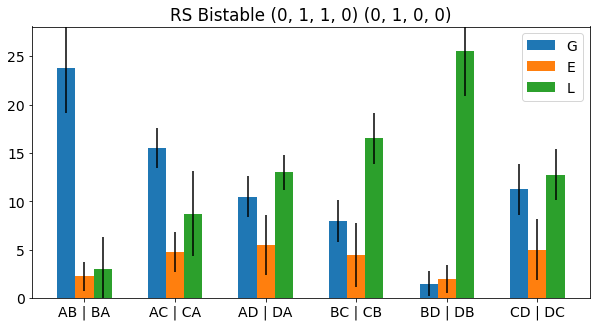

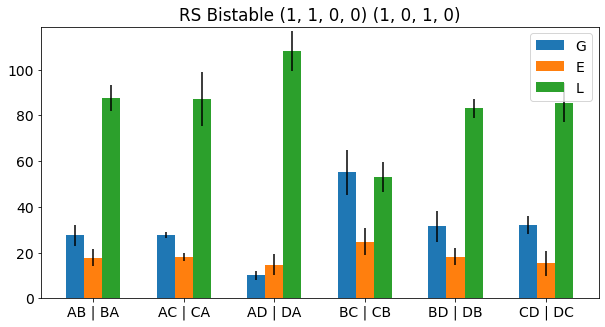

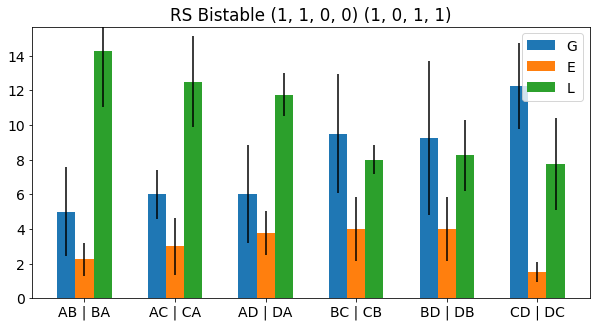

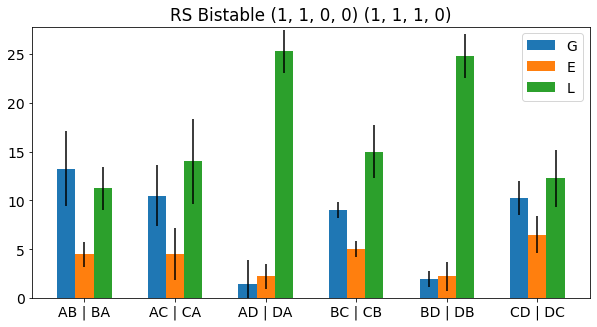

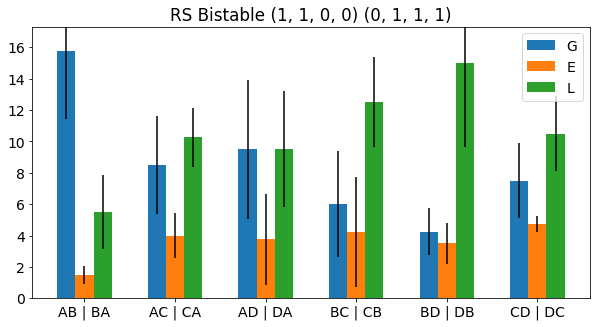

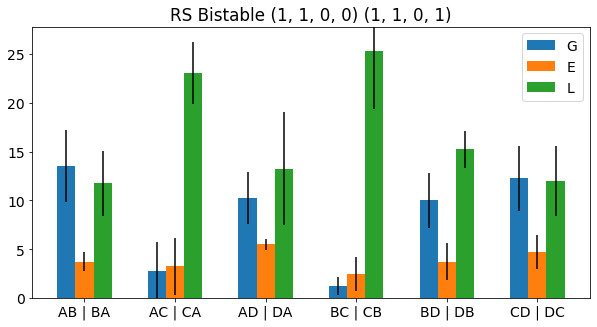

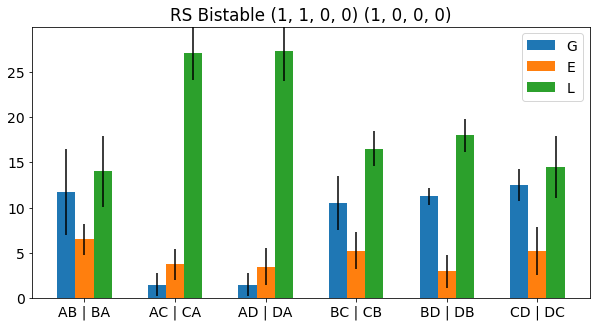

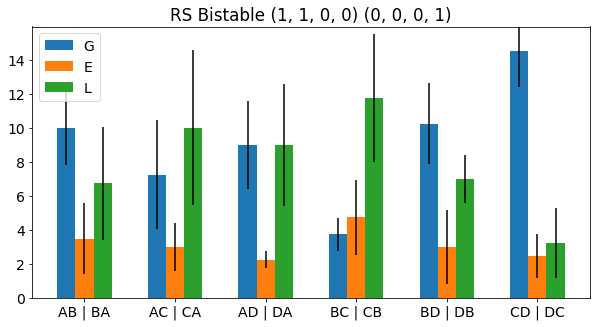

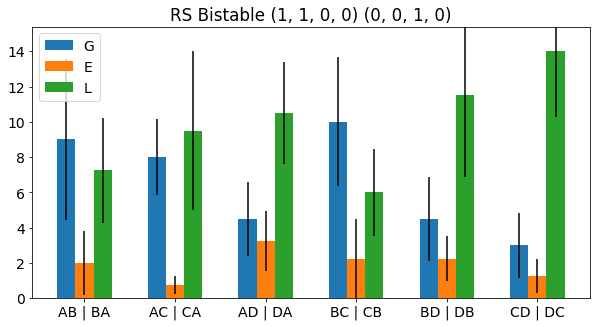

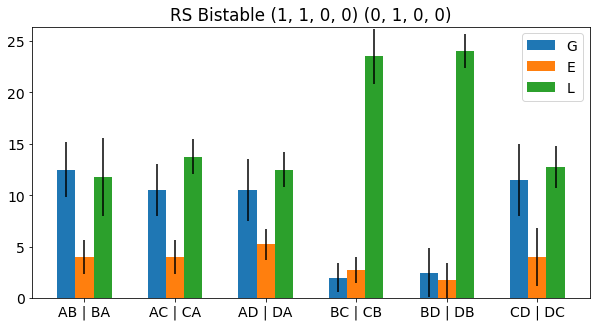

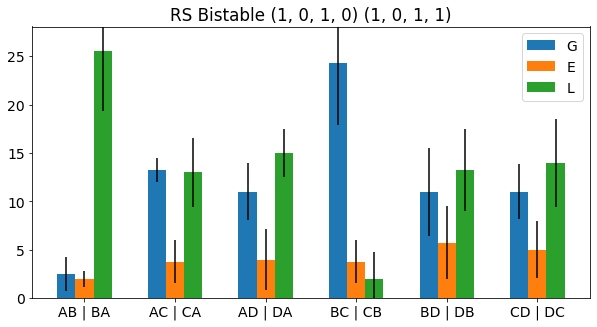

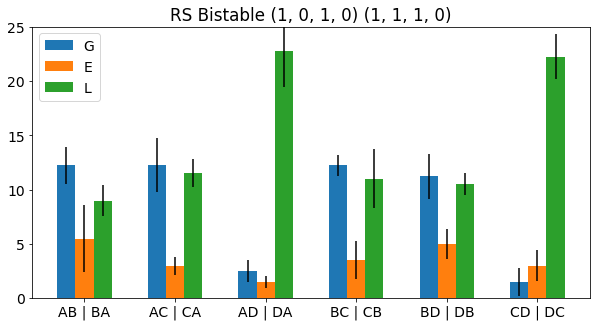

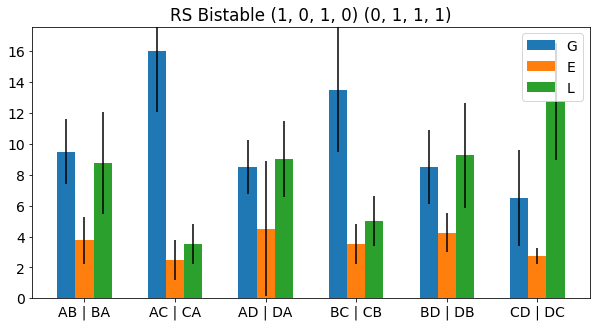

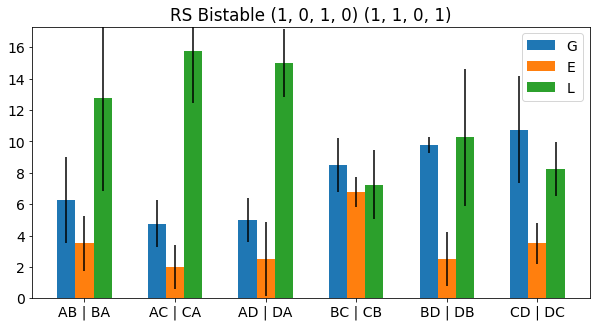

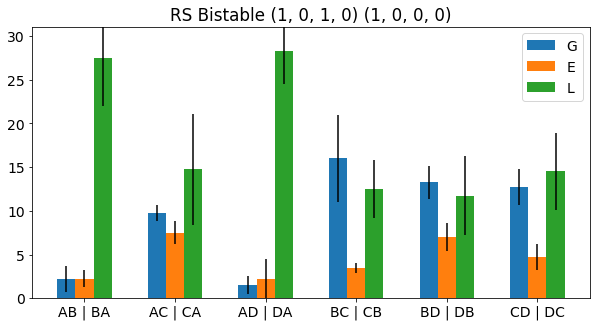

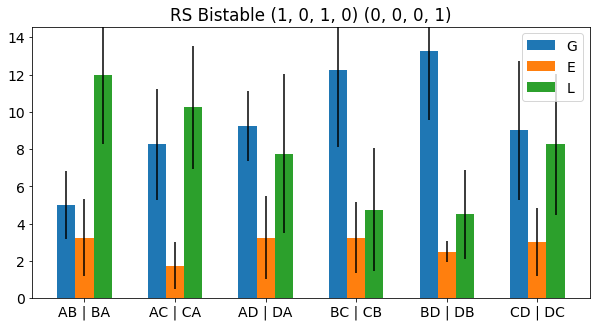

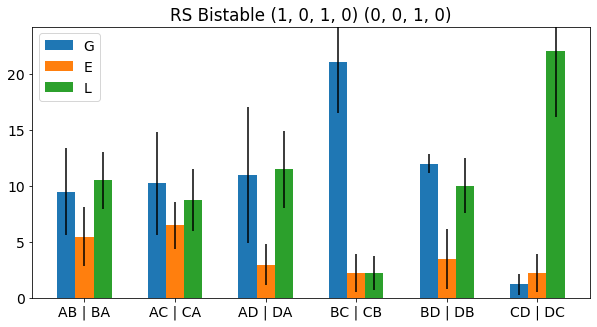

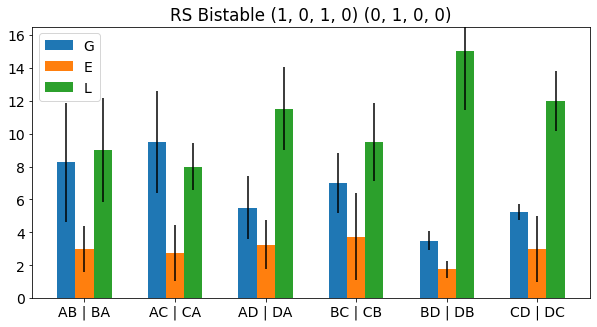

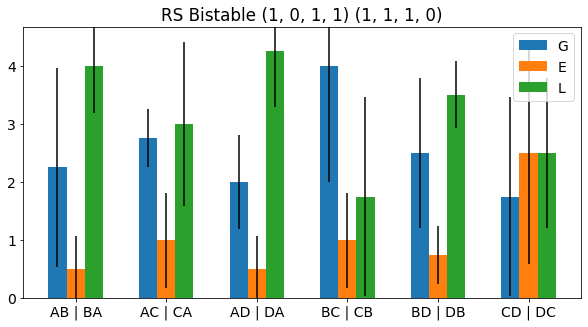

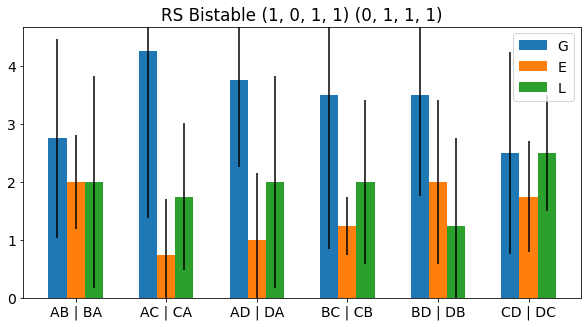

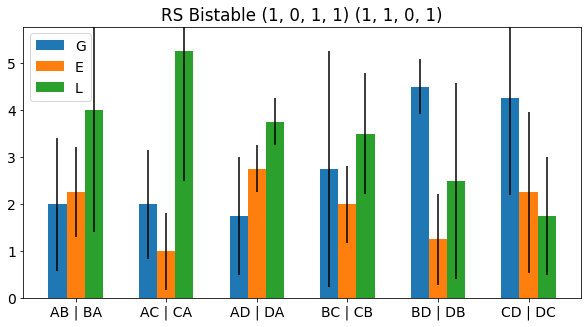

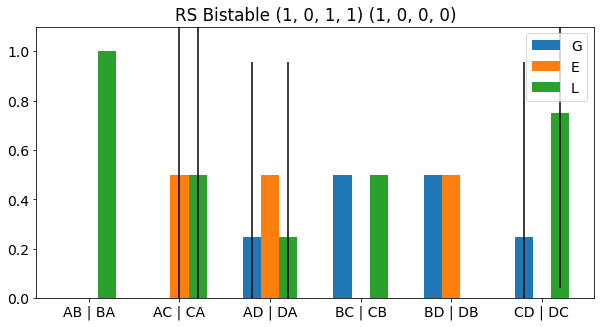

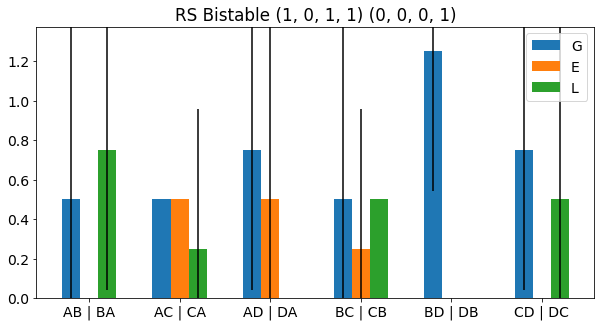

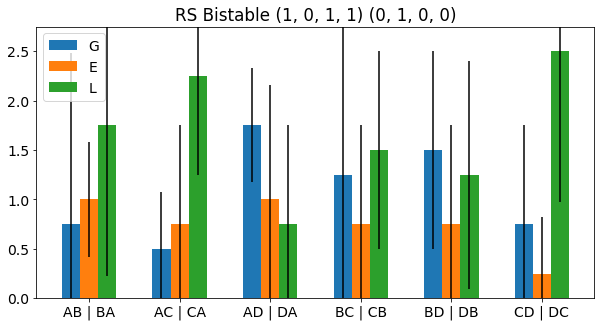

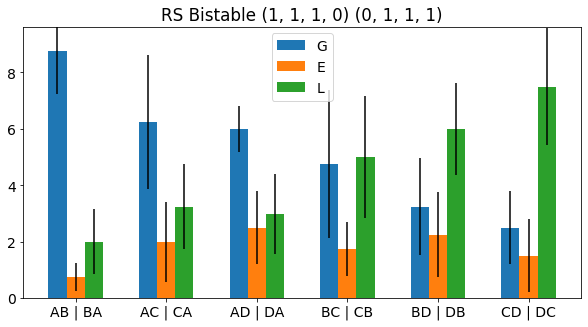

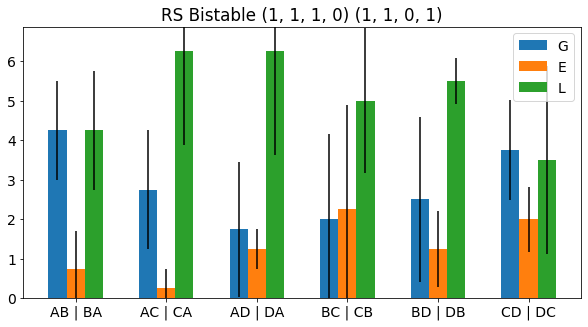

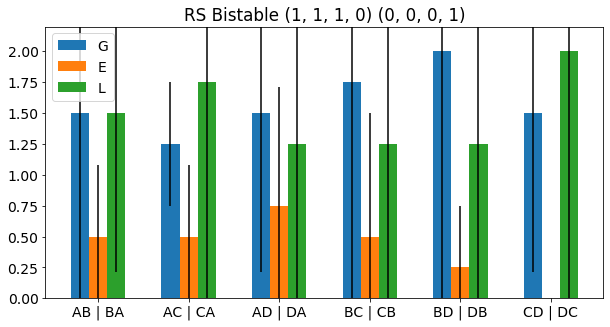

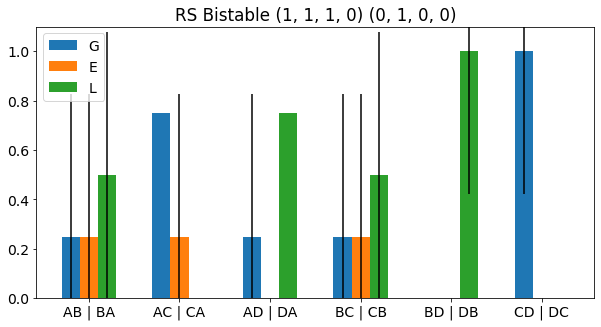

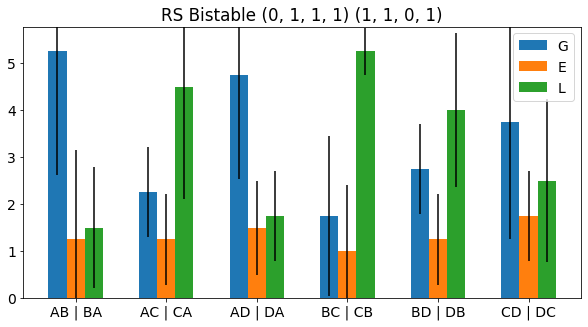

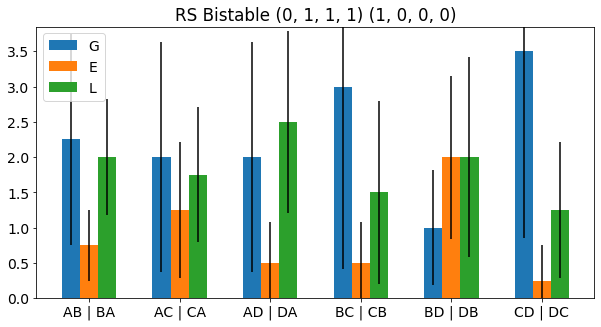

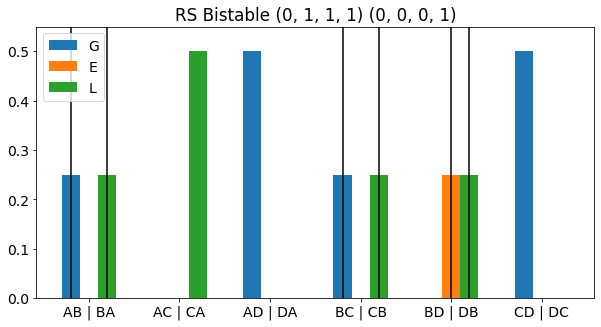

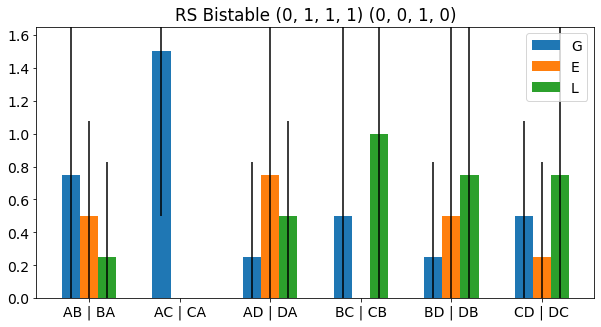

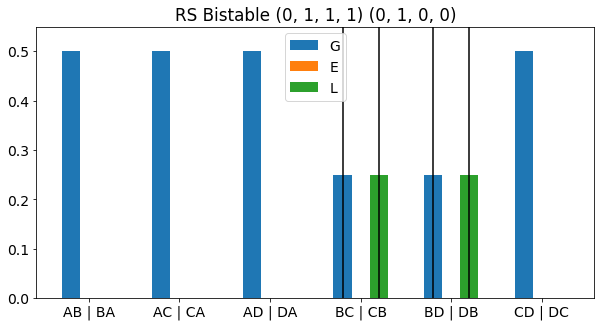

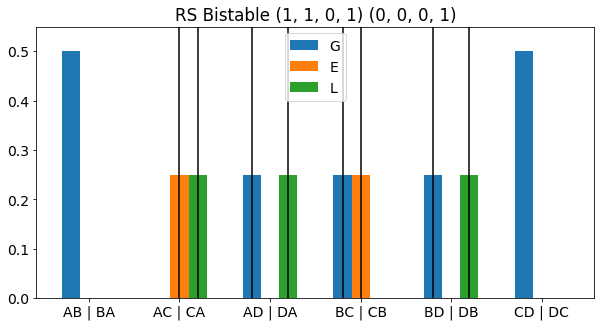

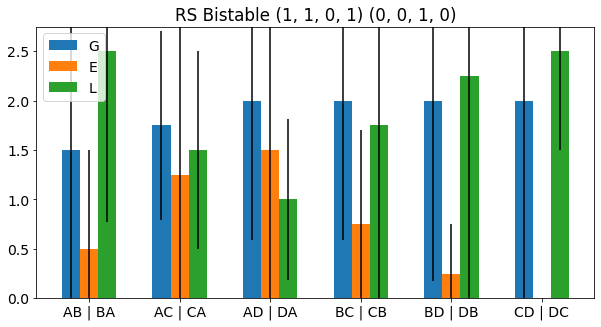

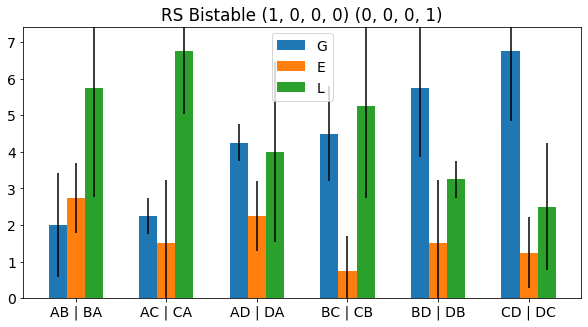

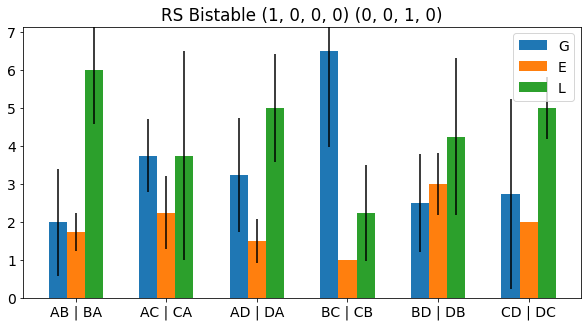

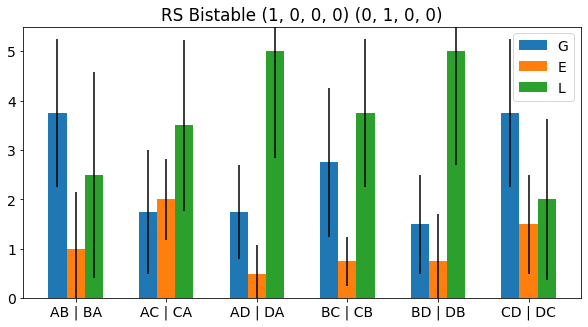

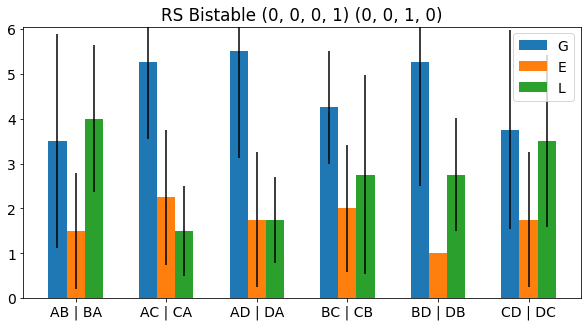

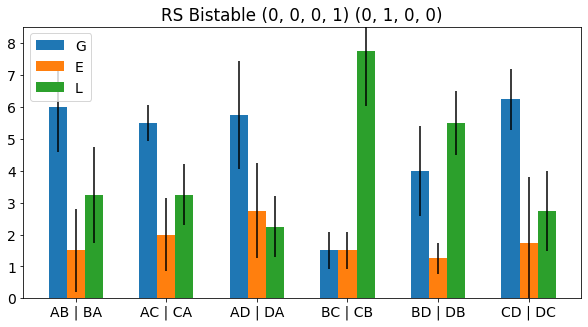

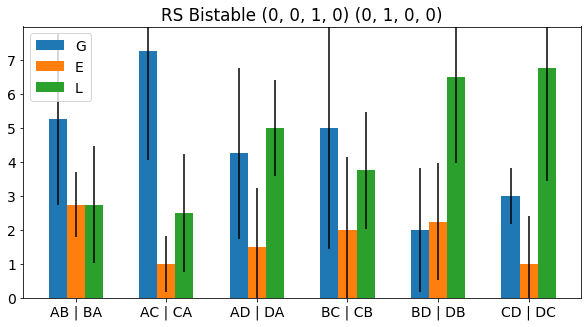

In [251]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
for fp in avg_data:
   if (avg_data[fp]['G'], avg_data[fp]['E'], avg_data[fp]['L']) != ([], [], []):
      data = {
         'G': avg_data[fp]['G'],
         'E': avg_data[fp]['E'],
         'L': avg_data[fp]['L'],
      }

      labels = ['AB | BA', 'AC | CA', 'AD | DA', 'BC | CB', 'BD | DB', 'CD | DC']
      bar_width = 0.2
      x_pos = np.arange(len(labels))
      fig, ax = plt.subplots(figsize=(10,5))

      # Loop through each group of bars and create a set of bars for each group
      for i, (group, values) in enumerate(data.items()):
         # Calculate the x-axis position for the current group of bars
         pos = x_pos + (i * bar_width)
         # Create a set of bars for the current group
         rects = ax.bar(pos, values, width=bar_width, label=group, yerr = avg_data[fp]['err'+group])
         #ax.bar_label(rects, padding=3)

      # Set the x-axis labels and tick positions
      ax.set_xticks(x_pos + ((len(data) - 1) / 2) * bar_width)
      ax.set_xticklabels(labels)

      ax.legend()

      ax.set_title('RS Bistable ' + str(tuple([int(i/3) for i in fp[0]])) + ' ' + str(tuple([int(i/3) for i in fp[1]])))
      m =  max(max(avg_data[fp]['G']), max(avg_data[fp]['L']), max(avg_data[fp]['E']))
      ax.set_ylim(0,m+.1*m)
      # Show the plot
      figname = '/home/elizabeth/Desktop/Tetrahedron/figures/RS_Bistable_'+str(fp)+'.png'
      plt.savefig(figname)
      plt.show()

In [59]:
all_states

[(0, 3, 0, 3),
 (0, 0, 3, 3),
 (3, 0, 0, 3),
 (0, 3, 3, 0),
 (3, 3, 0, 0),
 (3, 0, 3, 0),
 (3, 0, 3, 3),
 (3, 3, 3, 0),
 (0, 3, 3, 3),
 (3, 3, 0, 3),
 (3, 0, 0, 0),
 (0, 0, 0, 3),
 (0, 0, 3, 0),
 (0, 3, 0, 0),
 (3, 3, 3, 3),
 (0, 0, 0, 0)]

In [84]:
pairs = [('A','B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]
pairs

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

In [ ]:
data_by_fp = {}

for fp in all_states:
    data_by_fp[fp] = {'G':[], 'L':[], 'E':[]}
    fp_string = 'FP { ' + str(fp[0]) + ', ' + str(fp[1]) + ', ' + str(fp[2]) + ', ' + str(fp[3]) + ' }'
    data_labels = []
    for pair in pairs:
        node1 = pair[0] + ' :'
        t1 = 'T['+pair[0]+'->'+pair[1]+']'
        node2 = pair[1] + ' :'
        t2 = 'T['+pair[1]+'->'+pair[0]+']'

        data_labels.append(pair[0]+pair[1])
        data_labels.append(pair[0]+pair[1]+'e')
        data_labels.append(pair[1]+pair[0])

        ineq = get_inequalities_for_FPs(strict_Bool_MS,[fp_string],network_location,net_name)
        if ineq != []:

            node1_greater = 0
            node2_greater = 0
            equal = 0
            for i in ineq:
               # print(i[i.find(node1):i.find(t1)])
                u1 = i[i.find(node1):i.find(t1)].count('p')
                #print(i[i.find(node2):i.find(t2)])
                u2 = i[i.find(node2):i.find(t2)].count('p')
                if u1 > u2:
                    node1_greater += 1
                if u1 == u2:
                    equal += 1
                if u1 < u2:
                    node2_greater += 1
            #print(pair, fp, node1_greater, equal, node2_greater, len(ineq))
            data_by_fp[fp]['G'].append(node1_greater)
            data_by_fp[fp]['L'].append(node2_greater)
            data_by_fp[fp]['E'].append(equal)

In [170]:
node = 'A :'
t = 'T[A->B]'

data_by_fp = {}

for fp in all_states:
    data_by_fp[fp] = {'G':[], 'L':[], 'E':[]}
    fp_string = 'FP { ' + str(fp[0]) + ', ' + str(fp[1]) + ', ' + str(fp[2]) + ', ' + str(fp[3]) + ' }'
    data_labels = []
    for pair in pairs:
        node1 = pair[0] + ' :'
        t1 = 'T['+pair[0]+'->'+pair[1]+']'
        node2 = pair[1] + ' :'
        t2 = 'T['+pair[1]+'->'+pair[0]+']'

        data_labels.append(pair[0]+pair[1])
        data_labels.append(pair[0]+pair[1]+'e')
        data_labels.append(pair[1]+pair[0])

        ineq = get_inequalities_for_FPs(strict_Bool_MS,[fp_string],network_location,net_name)
        if ineq != []:

            node1_greater = 0
            node2_greater = 0
            equal = 0
            for i in ineq:
               # print(i[i.find(node1):i.find(t1)])
                u1 = i[i.find(node1):i.find(t1)].count('p')
                #print(i[i.find(node2):i.find(t2)])
                u2 = i[i.find(node2):i.find(t2)].count('p')
                if u1 > u2:
                    node1_greater += 1
                if u1 == u2:
                    equal += 1
                if u1 < u2:
                    node2_greater += 1
            #print(pair, fp, node1_greater, equal, node2_greater, len(ineq))
            data_by_fp[fp]['G'].append(node1_greater)
            data_by_fp[fp]['L'].append(node2_greater)
            data_by_fp[fp]['E'].append(equal)

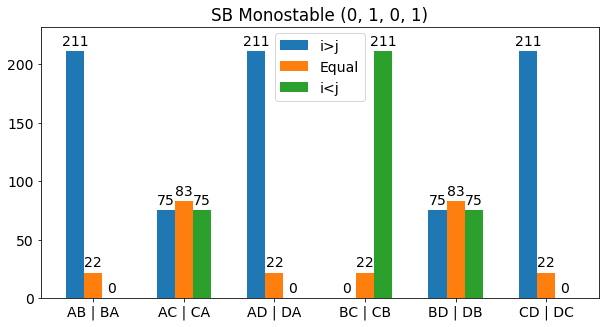

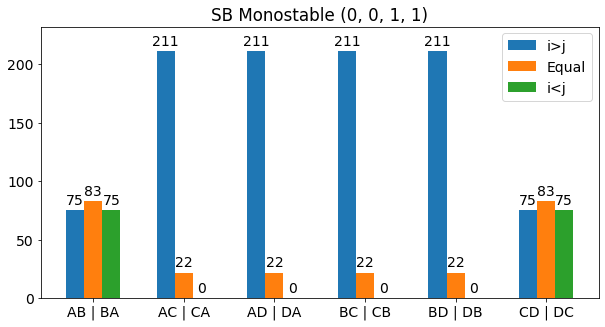

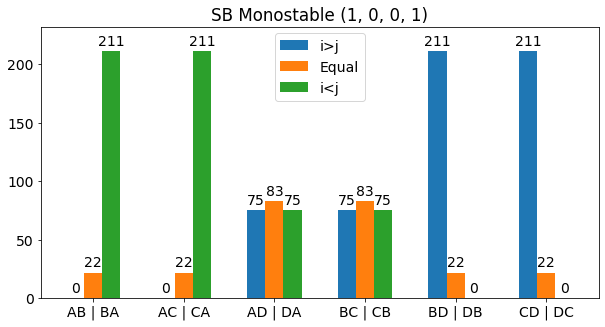

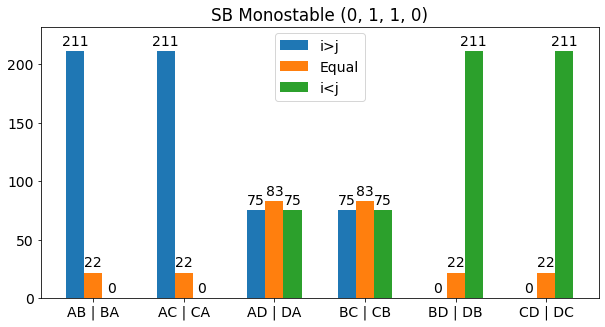

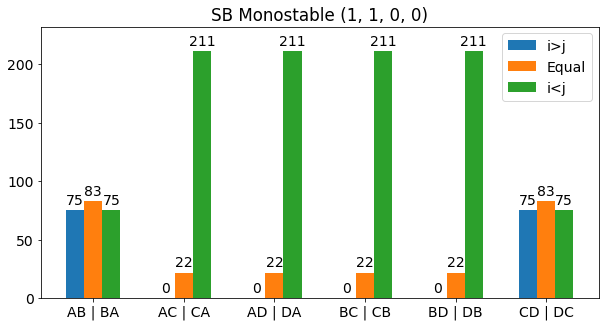

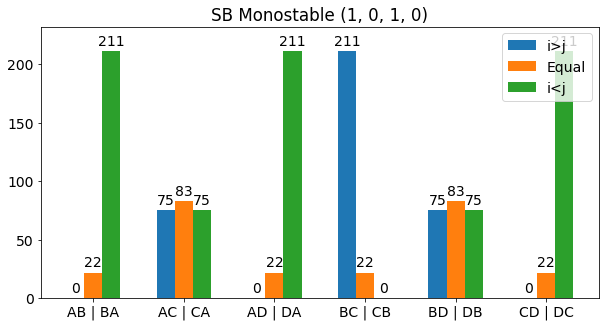

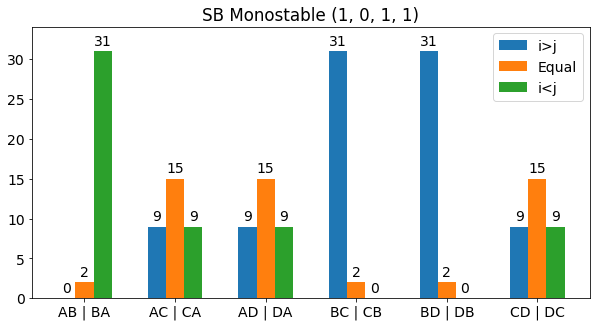

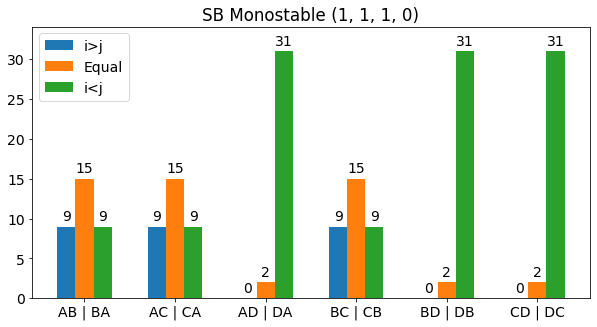

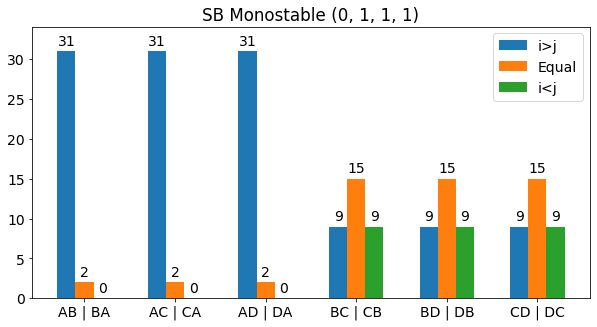

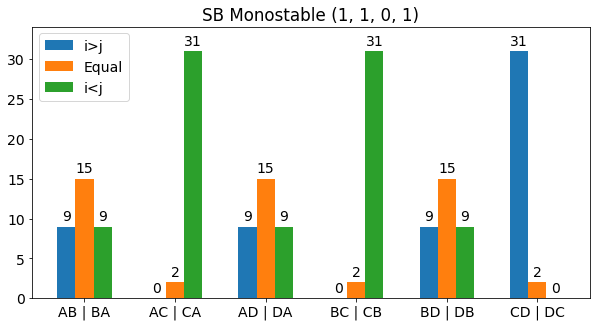

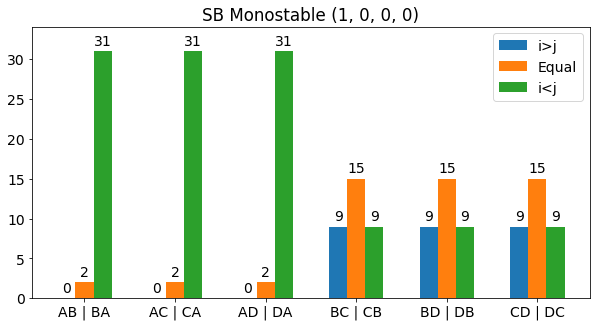

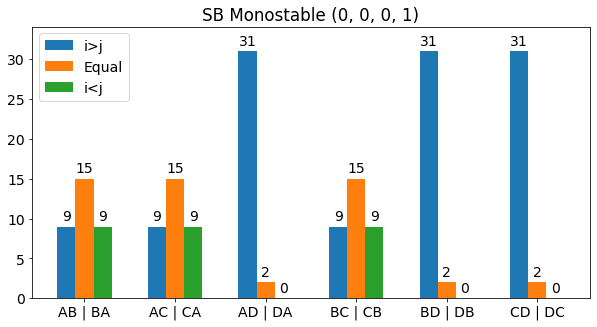

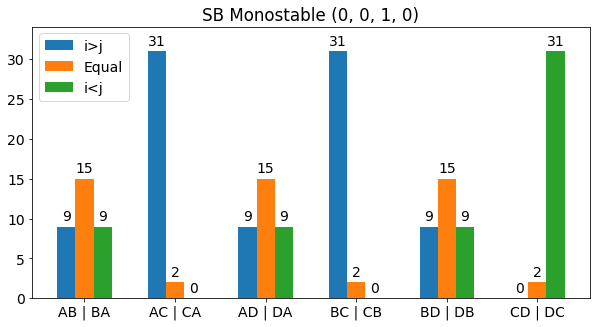

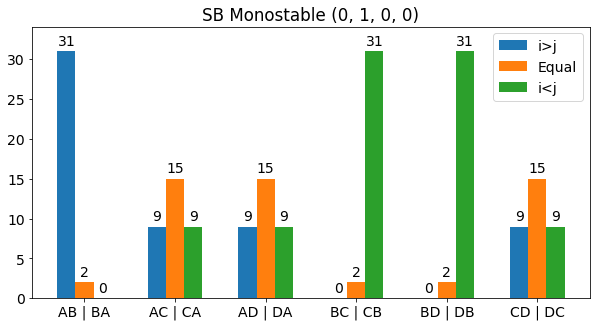

In [171]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
for fp in data_by_fp:
   if fp not in [(0, 0, 0, 0), (3, 3, 3, 3)]:
      data = {
         'i>j': data_by_fp[fp]['G'],
         'Equal': data_by_fp[fp]['E'],
         'i<j': data_by_fp[fp]['L'],
      }

      labels = ['AB | BA', 'AC | CA', 'AD | DA', 'BC | CB', 'BD | DB', 'CD | DC']
      bar_width = 0.2
      x_pos = np.arange(len(labels))
      fig, ax = plt.subplots(figsize=(10,5))

      # Loop through each group of bars and create a set of bars for each group
      for i, (group, values) in enumerate(data.items()):
         # Calculate the x-axis position for the current group of bars
         pos = x_pos + (i * bar_width)
         # Create a set of bars for the current group
         rects = ax.bar(pos, values, width=bar_width, label=group)
         ax.bar_label(rects, padding=3)
         
      # Set the x-axis labels and tick positions
      ax.set_xticks(x_pos + ((len(data) - 1) / 2) * bar_width)
      ax.set_xticklabels(labels)

      ax.legend()

      ax.set_title('SB Monostable ' + str(tuple([int(i/3) for i in fp])))
      m =  max(max(data_by_fp[fp]['G']), max(data_by_fp[fp]['L']))
      ax.set_ylim(0,m+.1*m)
      # Show the plot
      figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Monostable_'+str(fp)+'.png'
      plt.savefig(figname)
      plt.show()

In [167]:
node = 'A :'
t = 'T[A->B]'

data_by_fp = {}
Done = []
for fp1 in all_states:
    for fp2 in all_states:
        if fp1 != fp2:
            if (fp1, fp2) not in Done:
                Done.append((fp1, fp2))
                Done.append((fp2, fp1))

                data_by_fp[(fp1,fp2)] = {'G':[], 'L':[], 'E':[]}
                fp1_string = 'FP { ' + str(fp1[0]) + ', ' + str(fp1[1]) + ', ' + str(fp1[2]) + ', ' + str(fp1[3]) + ' }'
                fp2_string = 'FP { ' + str(fp2[0]) + ', ' + str(fp2[1]) + ', ' + str(fp2[2]) + ', ' + str(fp2[3]) + ' }'
                data_labels = []
                for pair in pairs:
                    node1 = pair[0] + ' :'
                    t1 = 'T['+pair[0]+'->'+pair[1]+']'
                    node2 = pair[1] + ' :'
                    t2 = 'T['+pair[1]+'->'+pair[0]+']'

                    data_labels.append(pair[0]+pair[1])
                    data_labels.append(pair[0]+pair[1]+'e')
                    data_labels.append(pair[1]+pair[0])

                    ineq = get_inequalities_for_FPs(strict_Bool_MS,[fp1_string, fp2_string],network_location,net_name)
                    if ineq != []:

                        node1_greater = 0
                        node2_greater = 0
                        equal = 0
                        for i in ineq:
                        # print(i[i.find(node1):i.find(t1)])
                            u1 = i[i.find(node1):i.find(t1)].count('p')
                            #print(i[i.find(node2):i.find(t2)])
                            u2 = i[i.find(node2):i.find(t2)].count('p')
                            if u1 > u2:
                                node1_greater += 1
                            if u1 == u2:
                                equal += 1
                            if u1 < u2:
                                node2_greater += 1
                        #print(pair, fp, node1_greater, equal, node2_greater, len(ineq))
                        data_by_fp[(fp1, fp2)]['G'].append(node1_greater)
                        data_by_fp[(fp1, fp2)]['L'].append(node2_greater)
                        data_by_fp[(fp1, fp2)]['E'].append(equal)
data_by_fp

{((0, 3, 0, 3), (0, 0, 3, 3)): {'G': [129, 129, 161, 54, 129, 129],
  'L': [6, 6, 0, 54, 6, 6],
  'E': [34, 34, 8, 61, 34, 34]},
 ((0, 3, 0, 3), (3, 0, 0, 3)): {'G': [54, 6, 129, 6, 129, 161],
  'L': [54, 129, 6, 129, 6, 0],
  'E': [61, 34, 34, 34, 34, 8]},
 ((0, 3, 0, 3), (0, 3, 3, 0)): {'G': [161, 129, 129, 6, 6, 54],
  'L': [0, 6, 6, 129, 129, 54],
  'E': [8, 34, 34, 34, 34, 61]},
 ((0, 3, 0, 3), (3, 3, 0, 0)): {'G': [129, 6, 54, 0, 6, 129],
  'L': [6, 129, 54, 161, 129, 6],
  'E': [34, 34, 61, 8, 34, 34]},
 ((0, 3, 0, 3), (3, 0, 3, 0)): {'G': [6, 4, 6, 6, 4, 6],
  'L': [6, 4, 6, 6, 4, 6],
  'E': [12, 16, 12, 12, 16, 12]},
 ((0, 3, 0, 3), (3, 0, 3, 3)): {'G': [1, 0, 7, 3, 6, 7],
  'L': [3, 0, 0, 1, 0, 0],
  'E': [3, 7, 0, 3, 1, 0]},
 ((0, 3, 0, 3), (3, 3, 3, 0)): {'G': [7, 0, 1, 0, 0, 1],
  'L': [0, 0, 3, 7, 6, 3],
  'E': [0, 7, 3, 0, 1, 3]},
 ((0, 3, 0, 3), (0, 3, 3, 3)): {'G': [], 'L': [], 'E': []},
 ((0, 3, 0, 3), (3, 3, 0, 3)): {'G': [], 'L': [], 'E': []},
 ((0, 3, 0, 3), (3, 0,

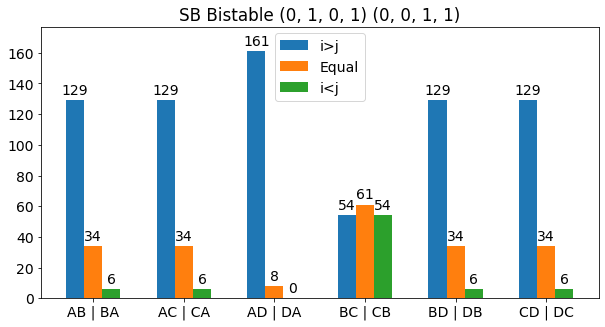

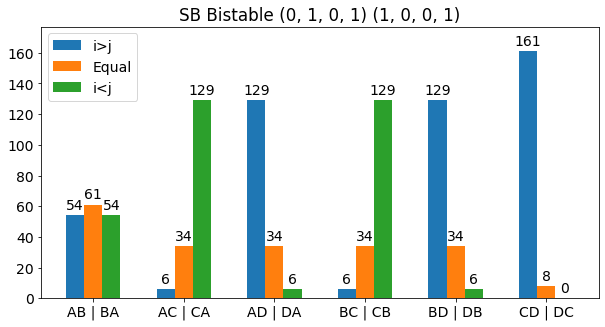

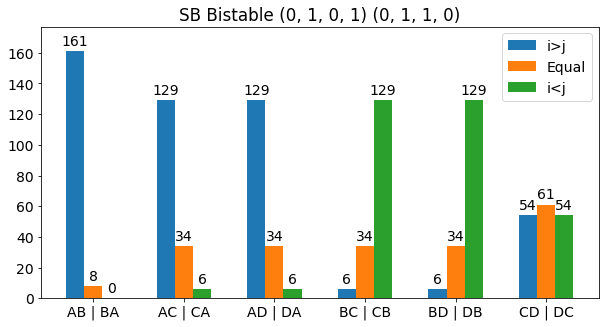

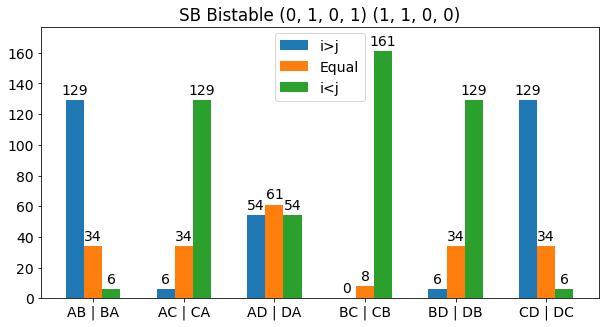

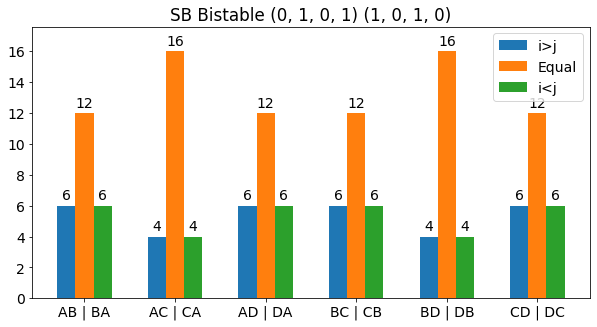

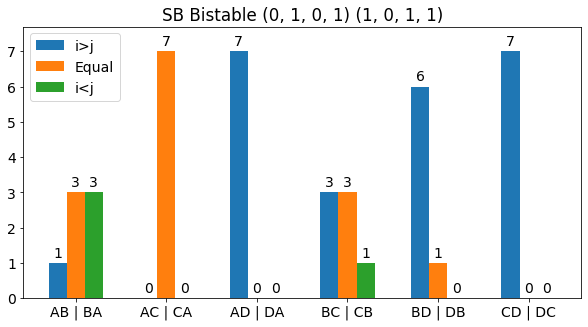

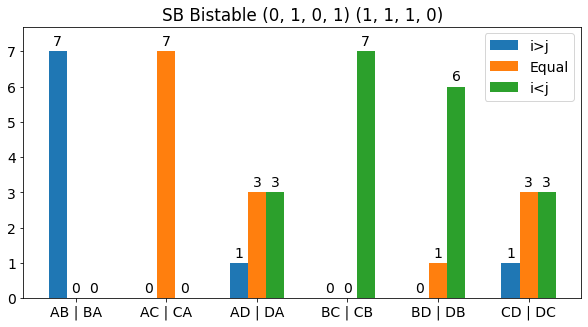

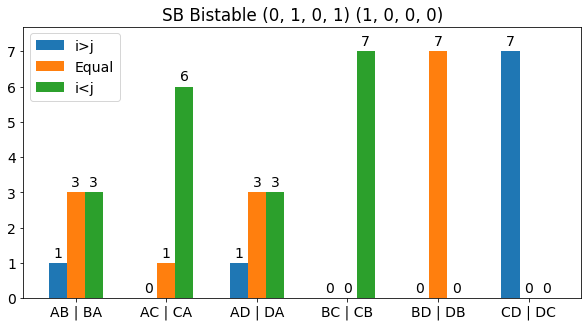

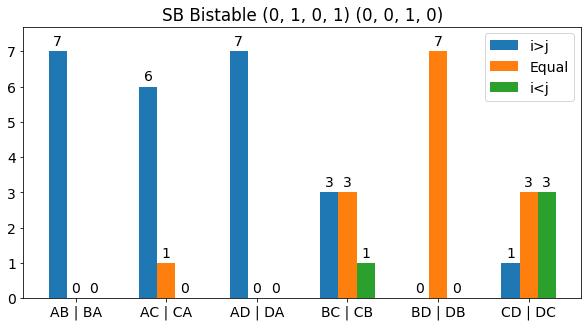

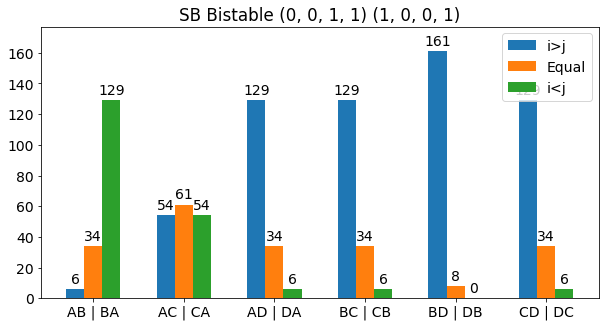

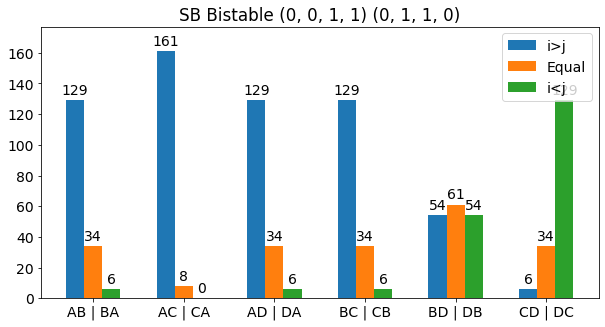

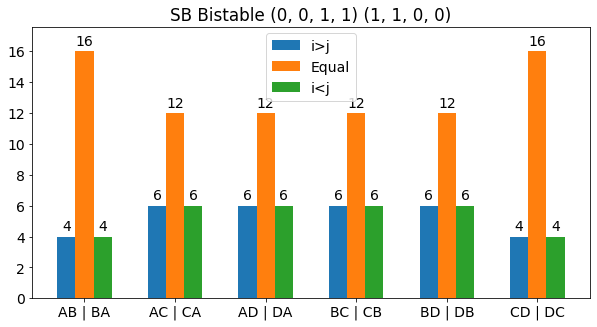

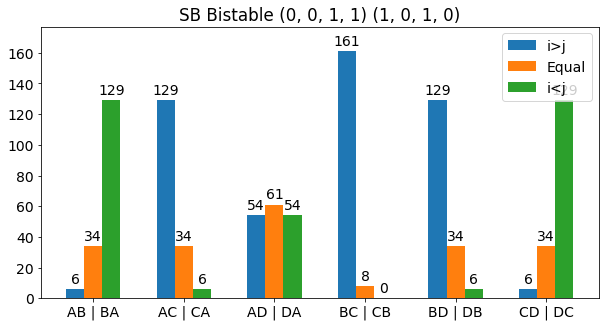

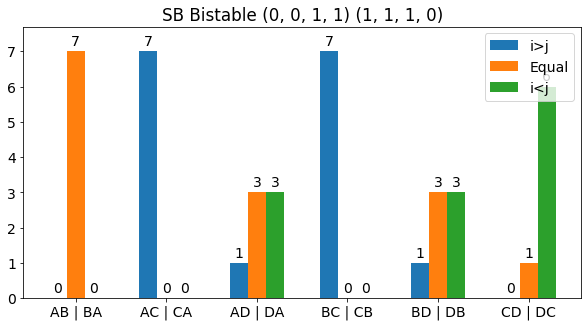

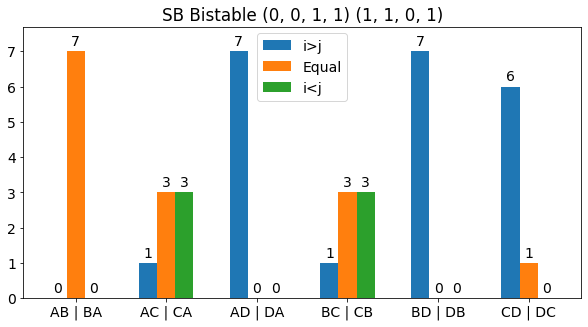

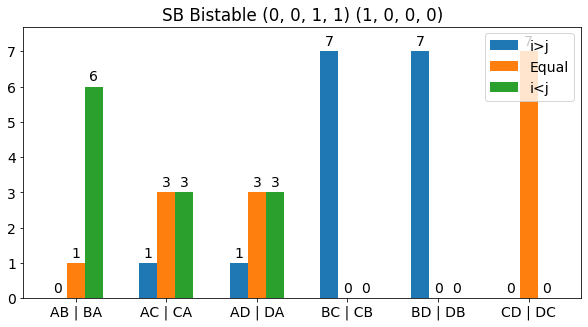

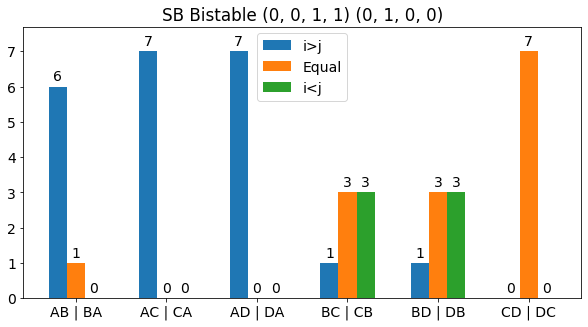

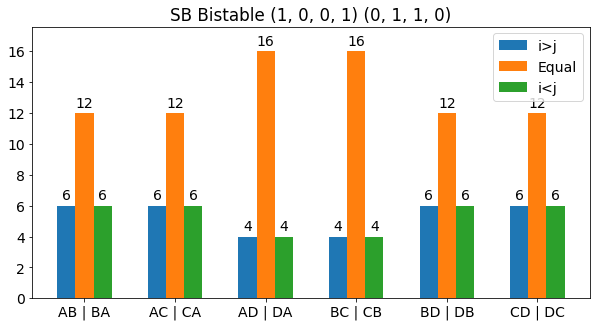

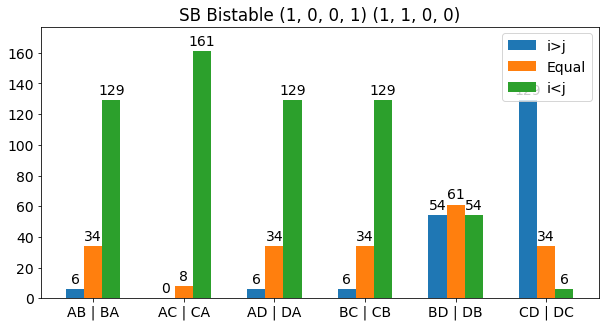

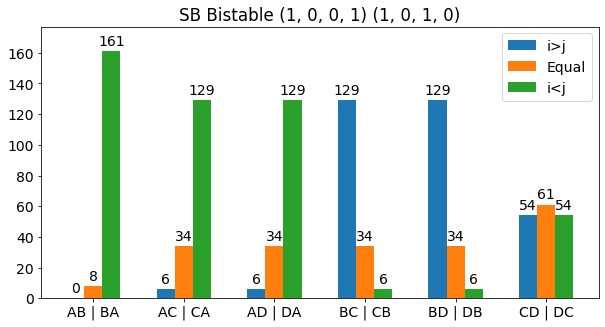

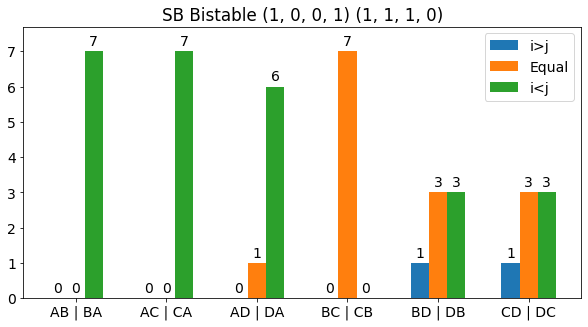

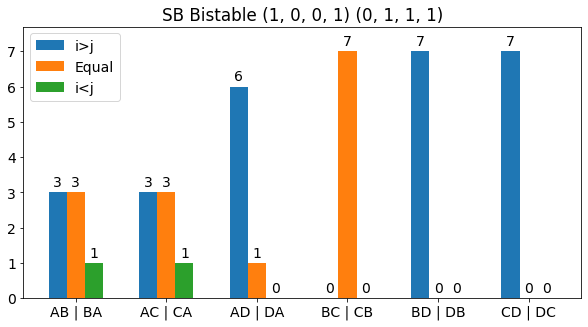

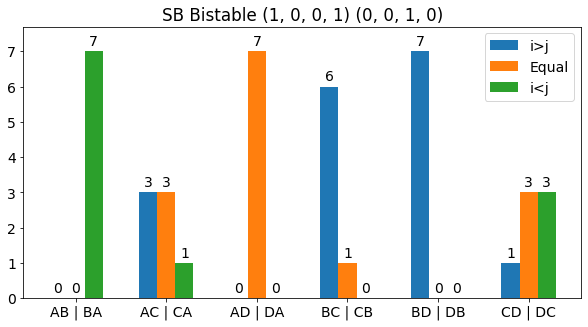

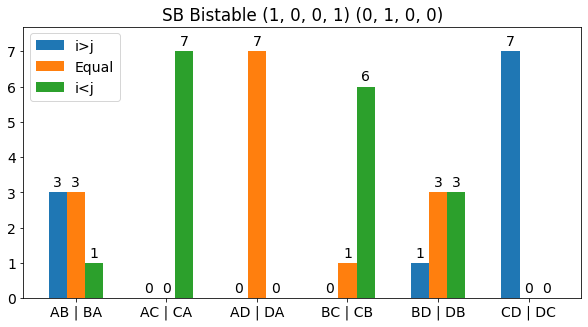

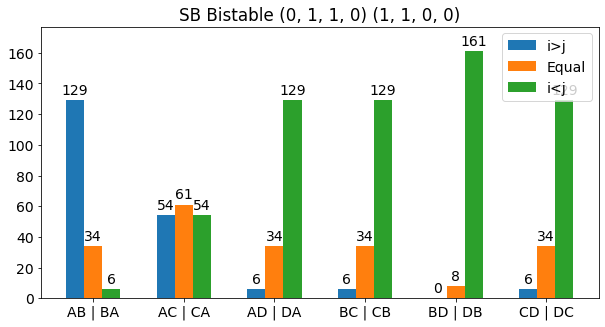

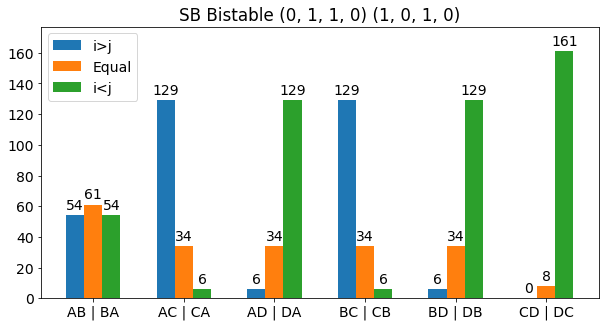

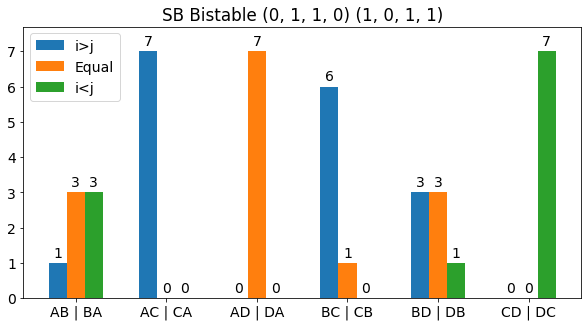

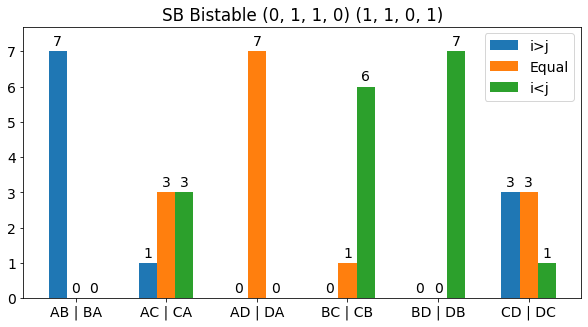

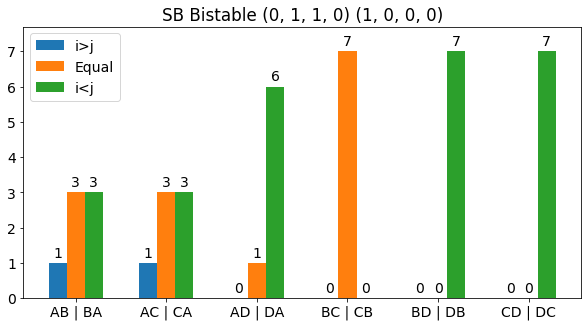

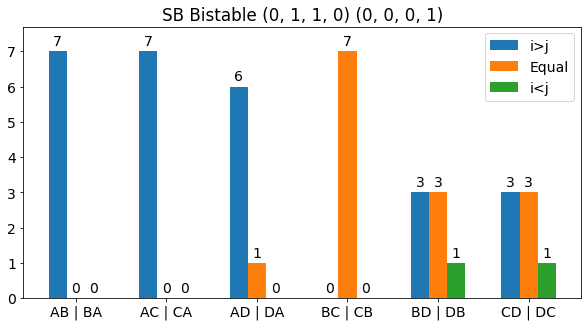

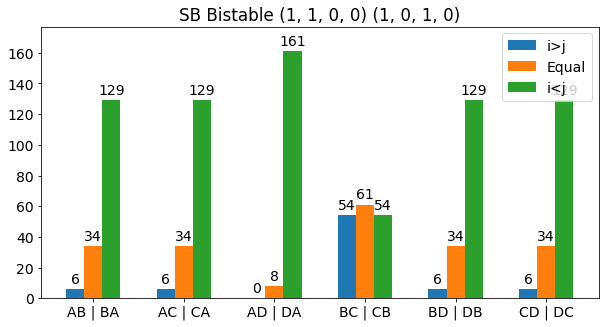

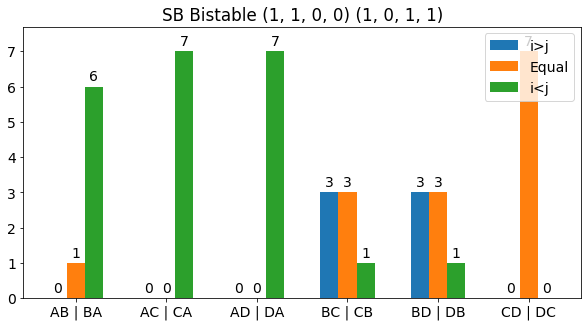

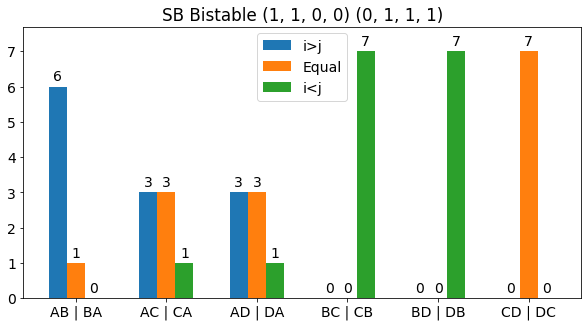

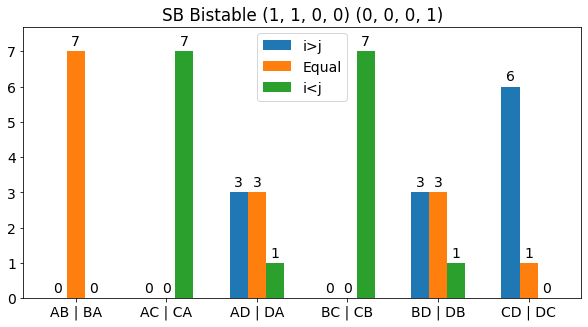

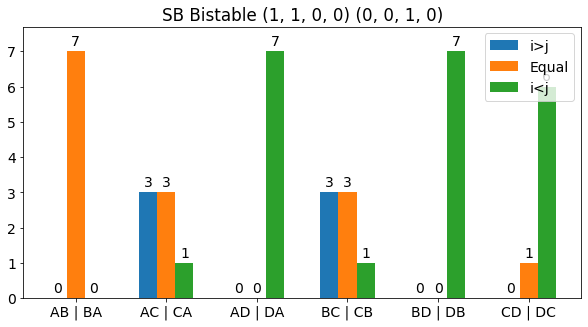

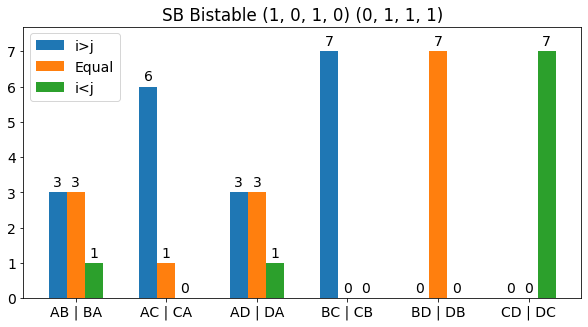

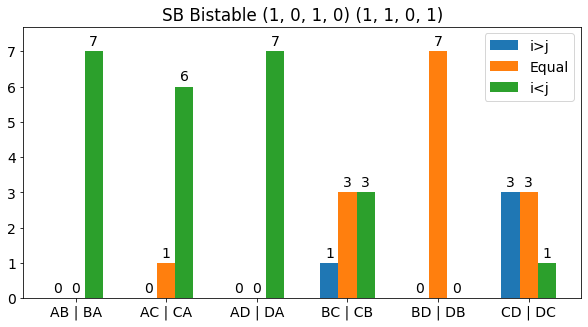

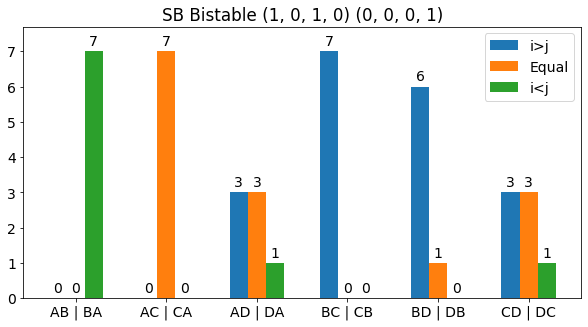

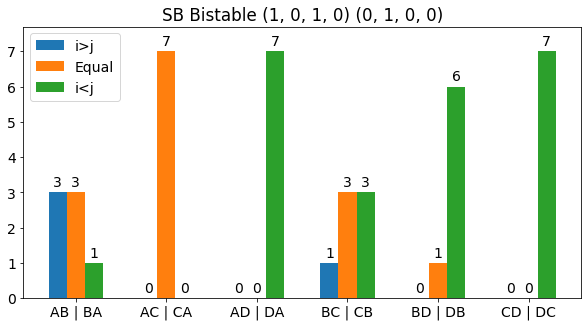

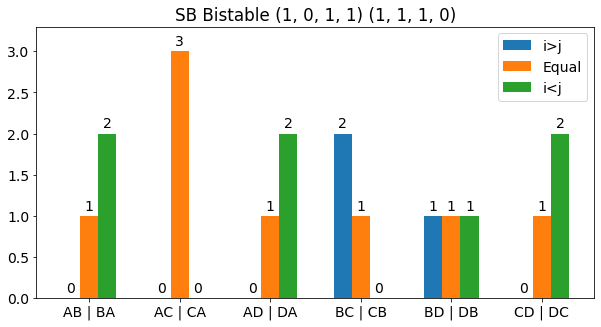

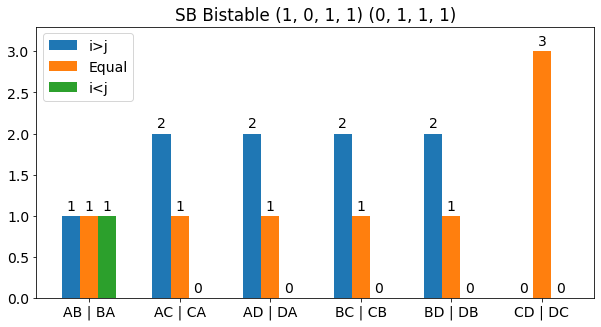

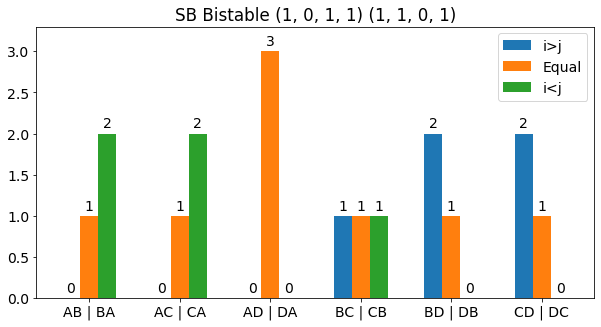

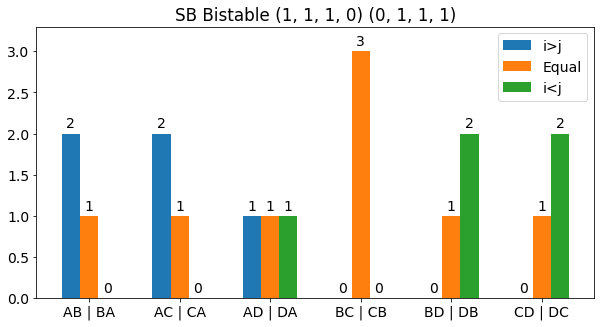

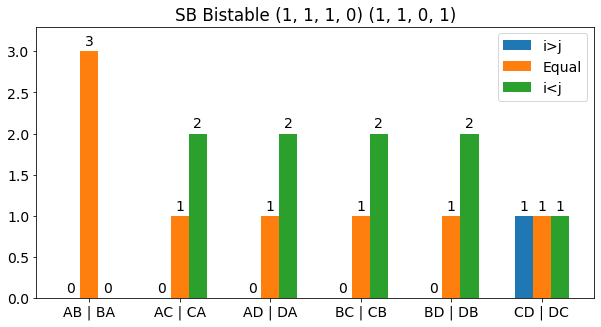

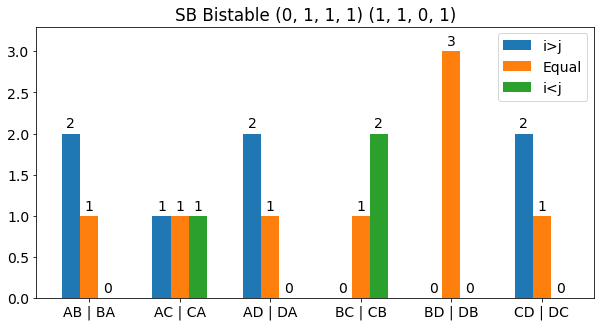

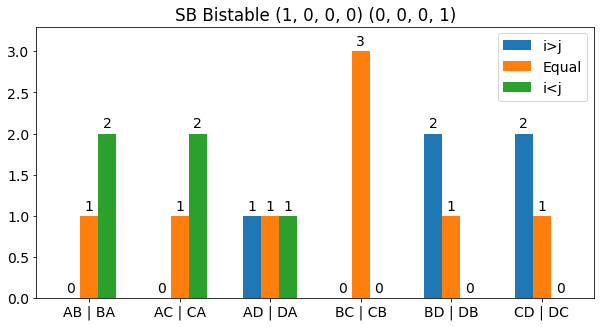

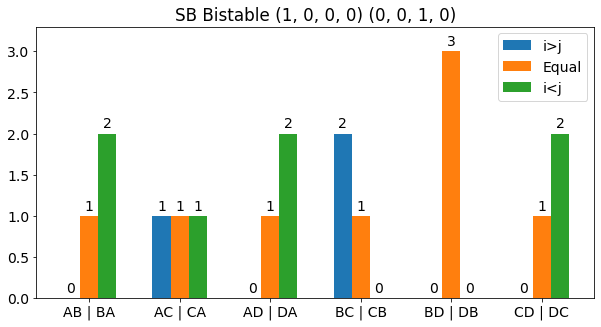

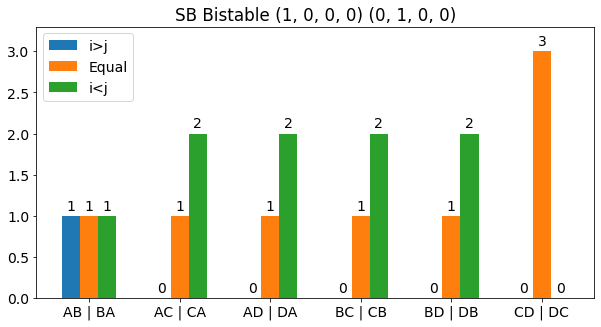

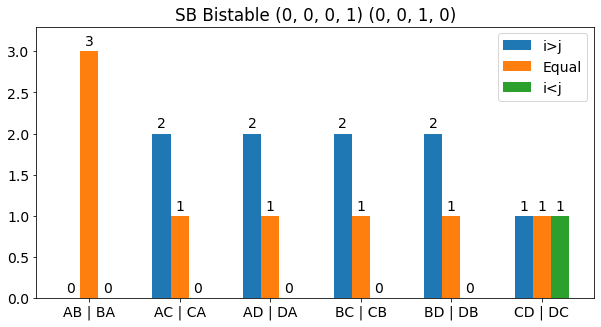

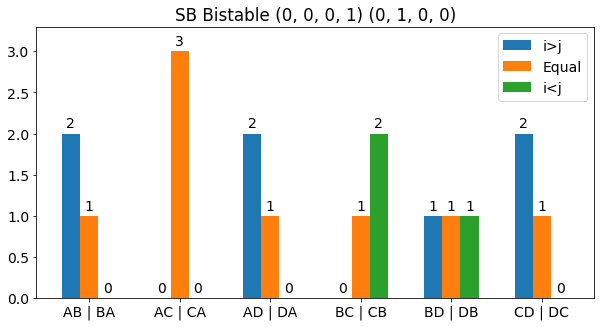

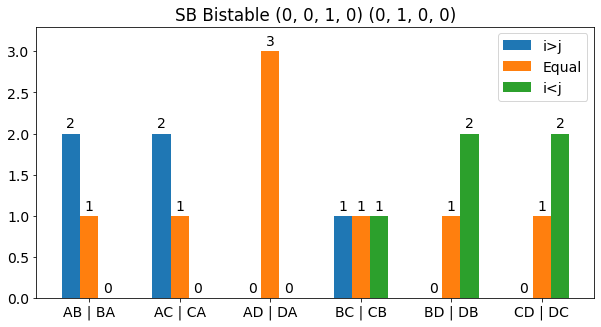

In [169]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

for fp in data_by_fp:
    if (data_by_fp[fp]['G'], data_by_fp[fp]['E'], data_by_fp[fp]['L']) != ([], [], []):
        data = {
            'i>j': data_by_fp[fp]['G'],
            'Equal': data_by_fp[fp]['E'],
            'i<j': data_by_fp[fp]['L'],
        }

        labels = ['AB | BA', 'AC | CA', 'AD | DA', 'BC | CB', 'BD | DB', 'CD | DC']
        bar_width = 0.2
        x_pos = np.arange(len(labels))
        fig, ax = plt.subplots(figsize=(10,5))

        # Loop through each group of bars and create a set of bars for each group
        for i, (group, values) in enumerate(data.items()):
            # Calculate the x-axis position for the current group of bars
            pos = x_pos + (i * bar_width)
            # Create a set of bars for the current group
            rects = ax.bar(pos, values, width=bar_width, label=group)
            ax.bar_label(rects, padding=3)
            
        # Set the x-axis labels and tick positions
        ax.set_xticks(x_pos + ((len(data) - 1) / 2) * bar_width)
        ax.set_xticklabels(labels)

        ax.legend()

        ax.set_title('SB Bistable ' + str(tuple([int(i/3) for i in fp[0]])) + ' ' + str(tuple([int(i/3) for i in fp[1]])))
        m =  max(max(data_by_fp[fp]['G']), max(data_by_fp[fp]['L']), max(data_by_fp[fp]['E']))
        ax.set_ylim(0,m+.1*m)
        # Show the plot
        figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Bistable_'+str(fp)+'.png'
        plt.savefig(figname)
        plt.show()

In [67]:
fig_title = "Mono State Phase Frequency (Strict Boolean)"
fig_name = f'{net_name}_Mono_State_Phase_Frequency_(Strict_Boolean)={n}'

mono_state_phase_freq_bar_plot(strict_Bool_MS, all_states, fig_title, fig_name)

TypeError: mono_state_phase_freq_bar_plot() missing 1 required positional argument: 'fig_name'

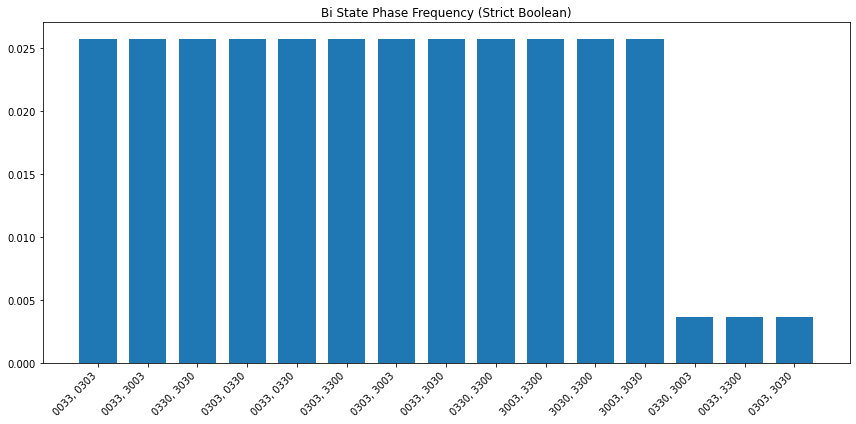

In [25]:
fig_title = "Bi State Phase Frequency (Strict Boolean)"
fig_name = f'{net_name}_Bi_State_Phase_Frequency_(Strict_Boolean)={n}'

bi_state_phase_freq_bar_plot(strict_Bool_MS, n, all_states, order, fig_title, fig_name)

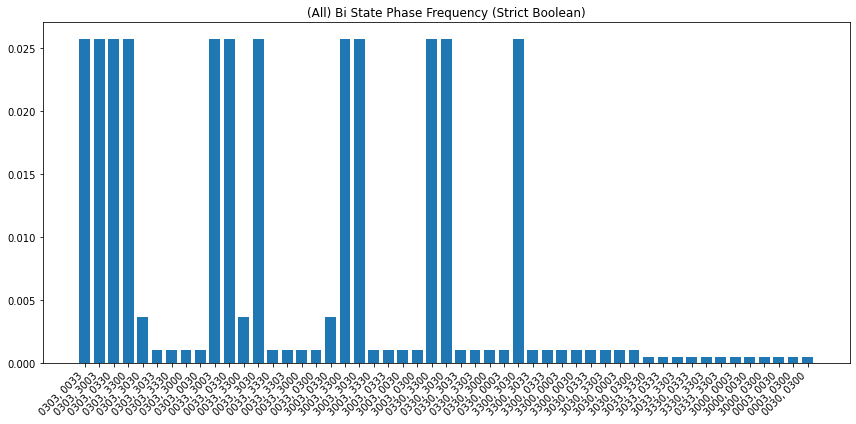

In [26]:
fig_title = "(All) Bi State Phase Frequency (Strict Boolean)"
fig_name = f'{net_name}_All_Bi_State_Phase_Frequency_(Strict_Boolean)={n}'

bi_state_phase_freq_bar_plot(strict_Bool_MS, n, all_states, None, fig_title, fig_name)

In [ ]:
hex_codes = ['0', '000', 'C0', 'C0']
theshold_orders = [[0],[0,1,2],[0,1],[0,1]]
get_parameter_inequalities(network,hex_codes,theshold_orders) 
#there are much nicer ineq outputs now. Do we need this version?

{'inequalities': 'L[B->A] L[C->A] < T[A->B] && U[B->A] L[C->A] < T[A->B] && L[B->A] U[C->A] < T[A->B] && U[B->A] U[C->A] < T[A->B] && 0 < T[A->B] < T[A->B] && 0 < L[B->A] < U[B->A] && 0 < L[C->A] < U[C->A] && L[A->B] L[D->B] < T[B->A] && U[A->B] L[D->B] < T[B->A] && L[A->B] U[D->B] < T[B->A] && U[A->B] U[D->B] < T[B->A] && 0 < T[B->A] < T[B->D] && 0 < L[A->B] < U[A->B] && 0 < L[D->B] < U[D->B] && L[A->C] L[D->C] < T[C->A] && U[A->C] L[D->C] < T[C->A] && L[A->C] U[D->C] < T[C->A] && T[C->D] < U[A->C] U[D->C] && 0 < T[C->A] < T[C->D] && 0 < L[A->C] < U[A->C] && 0 < L[D->C] < U[D->C] && L[B->D] L[C->D] < T[D->B] && U[B->D] L[C->D] < T[D->B] && L[B->D] U[C->D] < T[D->B] && T[D->C] < U[B->D] U[C->D] && 0 < T[D->B] < T[D->C] && 0 < L[B->D] < U[B->D] && 0 < L[C->D] < U[C->D]',
 'variables': '{L[B->A], L[C->A], U[B->A], U[C->A], T[A->B], T[A->B], L[A->B], L[D->B], U[A->B], U[D->B], T[B->A], T[B->D], L[A->C], L[D->C], U[A->C], U[D->C], T[C->A], T[C->D], L[B->D], L[C->D], U[B->D], U[C->D], T[D->

In [ ]:
make_data(network_location,net_name) #currently just puts get_boolean_stable_Morse_sets output into json file

Number of strict Boolean parameters: 1296


In [ ]:
essential_boolean_stable_sets = get_boolean_stable_Morse_sets(network_location)

Number of strict Boolean parameters: 1296


In [ ]:
def test_if_int(string):
    try:
        int(string)
        return True
    except ValueError:
        return False

def count_Morse_sets(stable_sets):
    fp_counts = {}
    for ms in stable_sets.values():
         # count the number of nodes that have desired state in an FP
         ms_str = "\n".join(ms)
         if ms_str in fp_counts:
             fp_counts[ms_str]["count"] += 1
         else:
             fp_counts[ms_str] = {}
             fp_counts[ms_str]["count"] = 1
             # FIXME: This next line will have to be modified when the number of out-edges is not the same for every node.
             fps = [str(len(list(filter(lambda x: x != '0' and test_if_int(x) == True, m)))) if m != "FC" else "FC" for m in ms]        
             fp_counts[ms_str]["multistability_type"] = " ".join(fps)
    fp_type_counts = {}
    for ms,d in fp_counts.items():
         key = d["multistability_type"]
         if key in fp_type_counts:
             fp_type_counts[key] += d["count"]
         else:
             fp_type_counts[key] = d["count"]
    #strict_fp_counts = {}
    #for i in fp_counts:
    #    if fp_counts[i]["multistability_type"] == 1:
    #        strict_fp_counts[i] = fp_counts[i]
    return fp_counts, fp_type_counts


def make_data(network,net_name):
    essential_boolean_stable_sets = get_boolean_stable_Morse_sets(network)
    json.dump(essential_boolean_stable_sets,open("results/{}_boolean_stable_sets.json".format(net_name),"w"))
    fp_counts,fp_type_counts = count_Morse_sets(essential_boolean_stable_sets)
    json.dump(fp_counts,open("results/{}_boolean_morse_set_counts.json".format(net_name),"w"))
    json.dump(fp_type_counts,open("results/{}_boolean_morse_set_type_counts.json".format(net_name),"w"))


In [ ]:
count_Morse_sets(essential_boolean_stable_sets)


({'FP { 0, 0, 0, 0 }': {'count': 1, 'multistability_type': '0'},
  'FP { 0, 0, 0, 2 }': {'count': 21, 'multistability_type': '1'},
  'FP { 0, 0, 2, 0 }': {'count': 21, 'multistability_type': '1'},
  'FP { 0, 0, 0, 2 }\nFP { 0, 0, 2, 0 }': {'count': 4,
   'multistability_type': '1 1'},
  'FP { 0, 0, 2, 2 }': {'count': 25, 'multistability_type': '2'},
  'FP { 0, 2, 0, 0 }': {'count': 21, 'multistability_type': '1'},
  'FP { 0, 0, 0, 2 }\nFP { 0, 2, 0, 0 }': {'count': 4,
   'multistability_type': '1 1'},
  'FP { 0, 2, 2, 0 }': {'count': 225, 'multistability_type': '2'},
  'FP { 0, 0, 0, 2 }\nFP { 0, 2, 2, 0 }': {'count': 16,
   'multistability_type': '1 2'},
  'FP { 0, 0, 2, 2 }\nFP { 0, 2, 2, 0 }': {'count': 20,
   'multistability_type': '2 2'},
  'FP { 0, 2, 0, 2 }': {'count': 25, 'multistability_type': '2'},
  'FP { 0, 2, 0, 2 }\nFP { 0, 2, 2, 0 }': {'count': 20,
   'multistability_type': '2 2'},
  'FP { 0, 2, 2, 2 }': {'count': 21, 'multistability_type': '3'},
  'FP { 2, 0, 0, 0 }': {

In [ ]:
def generateAllBinaryStrings(binary_list, n, arr, i):
    if i == n:
        a = []
        for i in range(0, n):
            a.append(arr[i])
        binary_list.append(a)
        return
     
    # First assign "0" at ith position
    # and try for all other permutations
    # for remaining positions
    arr[i] = 0
    generateAllBinaryStrings(binary_list, n, arr, i + 1)
 
    # And then assign "1" at ith position
    # and try for all other permutations
    # for remaining positions
    arr[i] = 1
    generateAllBinaryStrings(binary_list, n, arr, i + 1)

In [ ]:
import itertools
from itertools import chain, combinations
def powerset(iterable,exclude_sets_of_length_less_than):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(exclude_sets_of_length_less_than,len(s)+1))


def get_all_networks(node_list, number_of_edges, exclude_self_edges = True):
    """
    node_list: set of nodes wanting in network.
    n: number of edges wanting in network. 
    returns: list of tuples. First element in tuple is set of edges, second is a binary list 
             where 0 depictis edge is rep and 1 depicts if edge is act.
    """
    binary_list = []
    arr = [None]*number_of_edges
    generateAllBinaryStrings(binary_list, number_of_edges, arr, 0)

    if exclude_self_edges == True:
        edge_list = [(a, b) for a in node_list for b in node_list if a != b]
    else:
        edge_list = list(set([(a, b) for a in node_list for b in node_list]))

    all_edge_comb = list(itertools.combinations(edge_list, number_of_edges))
    all_network_comb =  [(a, b) for a in all_edge_comb for b in binary_list if list(set(itertools.chain(*a)).intersection(set(node_list))) == node_list]

    return all_network_comb

def random_network_gen(number_of_nodes, number_of_edges, node_number_fixed = True, edge_number_fixed = False, exclude_self_edges = True, max_edge_out_degree = None, max_in_edge_out_degree = None, node_list = None, min_node_number = 2):
    all_network_comb = []
    if node_list == None:
        node_list = list(range(number_of_nodes))

    if node_number_fixed == True:
        if edge_number_fixed == True:
            all_network_comb = get_all_networks(node_list, number_of_edges, exclude_self_edges)
            return all_network_comb
        if edge_number_fixed == False:
            for i in range(1,number_of_edges+1):
                nets_of_i_edges = get_all_networks(node_list, i, exclude_self_edges)
                all_network_comb.append(nets_of_i_edges)
    
    if node_number_fixed == False:
        for sub_node_list in powerset(node_list,min_node_number):
            if edge_number_fixed == True:
                sub_network_comb = get_all_networks(list(sub_node_list), number_of_edges, exclude_self_edges)
                all_network_comb.append(sub_network_comb)
            if edge_number_fixed == False:
                for i in range(1,number_of_edges+1):
                    nets_of_i_edges = get_all_networks(list(sub_node_list), i, exclude_self_edges)
                    all_network_comb.append(nets_of_i_edges)
    return list(itertools.chain(*all_network_comb))


In [ ]:
number_of_nodes = 4
node_number_fixed = True
number_of_edges = 12
edge_number_fixed = False
exclude_self_edges = True
min_node_number = None

all = random_network_gen(number_of_nodes, number_of_edges, node_number_fixed, edge_number_fixed, exclude_self_edges, min_node_number)
len(all)

528576

In [ ]:
def get_network_string(net):
    """
    net: tuple, with first item a set of edges, and second item with a list of 0,1's depicting if edge in first item
    is repressing (0) or activating (1). 
    
    Example:  net = ((('Hb', 'Gt'),
                ('Hb', 'Kr'),
                ('Hb', 'Kni'),
                ('Gt', 'Hb'),
                ('Gt', 'Kr'),
                ('Gt', 'Kni'),
                ('Kr', 'Hb'),
                ('Kr', 'Gt')),
                [0, 0, 1, 1, 0, 0, 1, 0])
    then the edge from 'Hb' to 'Gt' is repressing while the 'Kr' to 'Hb' edge is activating.

    returns: string for use with DSGRN network input.
    """
    node_list = list(itertools.chain(*net[0]))
    net_dict = {}
    for n in node_list:
        net_dict[n] = []

    for i in net[0]:
        index = net[0].index(i)
        net_dict[i[1]] += [(net[1][index], i[0])]
        
    new = {}
    for node in net_dict:
        d = defaultdict(list)
        act_str = ''
        rep_str = ''
        for k, *v in net_dict[node]:
            d[k].append(v)
        
        for edge_type in list(d.items()):
            if edge_type[0] == 0:
                rep_str = ''
                for i in edge_type[1]:
                    rep_str += '(~' + str(i[0]) + ')'

            if edge_type[0] == 1:
                act_str = '('
                for i in edge_type[1]:
                    if edge_type[1].index(i) == 0:
                        act_str +=  str(i[0])
                    else:
                        act_str +=  '+' + str(i[0])
                act_str += ')'
        new[node] = act_str + rep_str
    string = ""
    for node in new:
        string += str(node) + ' : ' + new[node] + '\n' 

    return string
    #return '"""Hb : ' + new['Hb'] + '\n' + 'Gt : ' + new['Gt'] + '\n' + 'Kr : ' + new['Kr'] + '\n' + 'Kni : ' + new['Kni'] + '"""'


def computable_networks(all_network_comb):  
    count = 0
    computable = {}
    for net in all_network_comb:
        string = get_network_string(net)
        computable[count] = {'edges': list(net[0]), 'bool': net[1], 'string':string, 'Done':False}
        #stable_MS, nbp = get_boolean_stable_Morse_sets(string)
        network = DSGRN.Network(string)
        pg = ParameterGraph(network)
        p = pg.size()
        computable[count]['pg size'] = p
        #computable[count]['# bool params'] = nbp
        #computable[count]['stable MS'] = stable_MS
        count += 1
    return computable

In [ ]:
def add_boolean_stable_Morse_sets(computable, max_pg_size):

    for net in computable:
        if computable[net]['Done'] == False:
            if computable[net]['pg size'] <= max_pg_size:
                stable_MS, nbp = get_boolean_stable_Morse_sets(computable[net]['string'])
                fp_counts, fp_type_counts = count_Morse_sets(stable_MS)
                computable[net]['# bool params'] = nbp
                computable[net]['stable MS'] = stable_MS
                computable[net]['FP counts'] = fp_counts
                computable[net]['FP type counts'] = fp_type_counts
                computable[net]['Done'] = True
    
    return computable

In [ ]:
import networkx as nx
def test_connected(edge_list):
    G = nx.Graph()
    for e1,e2 in edge_list:
        G.add_edge(e1,e2)
    return nx.is_connected(G)

def return_connected(network_list):
    connected_networks = [net for net in network_list if test_connected(net[0]) == True]
    return connected_networks



In [ ]:
def get_boolean_stable_Morse_sets(network):
    boolean_stable_sets = {}
    net = DSGRN.Network(network)
    boolean_params = sbp.subset_boolean_parameters(net)
    #print("Number of strict Boolean parameters: {}".format(len(boolean_params)))
    for p in boolean_params:
        stable_morse_sets = get_stable_Morse_sets(p)
        hexcodes = " ".join(p.logic()[node_index].hex() for node_index in range(net.size()))
        boolean_stable_sets[hexcodes] = sorted(stable_morse_sets)
    return boolean_stable_sets, len(boolean_params)

In [ ]:
connected = return_connected(all)
len(connected)

528384

In [ ]:
computable_w_pg_size = computable_networks(connected)
computable_w_pg_size

{0: {'edges': [(0, 1), (0, 2), (0, 3)],
  'bool': [0, 0, 0],
  'string': '0 : \n1 : (~0)\n2 : (~0)\n3 : (~0)\n',
  'Done': False,
  'pg size': 648},
 1: {'edges': [(0, 1), (0, 2), (0, 3)],
  'bool': [0, 0, 1],
  'string': '0 : \n1 : (~0)\n2 : (~0)\n3 : (0)\n',
  'Done': False,
  'pg size': 648},
 2: {'edges': [(0, 1), (0, 2), (0, 3)],
  'bool': [0, 1, 0],
  'string': '0 : \n1 : (~0)\n2 : (0)\n3 : (~0)\n',
  'Done': False,
  'pg size': 648},
 3: {'edges': [(0, 1), (0, 2), (0, 3)],
  'bool': [0, 1, 1],
  'string': '0 : \n1 : (~0)\n2 : (0)\n3 : (0)\n',
  'Done': False,
  'pg size': 648},
 4: {'edges': [(0, 1), (0, 2), (0, 3)],
  'bool': [1, 0, 0],
  'string': '0 : \n1 : (0)\n2 : (~0)\n3 : (~0)\n',
  'Done': False,
  'pg size': 648},
 5: {'edges': [(0, 1), (0, 2), (0, 3)],
  'bool': [1, 0, 1],
  'string': '0 : \n1 : (0)\n2 : (~0)\n3 : (0)\n',
  'Done': False,
  'pg size': 648},
 6: {'edges': [(0, 1), (0, 2), (0, 3)],
  'bool': [1, 1, 0],
  'string': '0 : \n1 : (0)\n2 : (0)\n3 : (~0)\n',
  

In [ ]:
computable_results = add_boolean_stable_Morse_sets(computable_w_pg_size, max_pg_size = 1000)
computable_results

{0: {'edges': [(0, 1), (0, 2), (0, 3)],
  'bool': [0, 0, 0],
  'string': '0 : \n1 : (~0)\n2 : (~0)\n3 : (~0)\n',
  'Done': True,
  'pg size': 648,
  '# bool params': 54,
  'stable MS': {'0 0 0 0': ['FP { 0, 0, 0, 0 }'],
   '0 0 0 2': ['FP { 0, 0, 0, 1 }'],
   '0 0 0 3': ['FP { 0, 0, 0, 1 }'],
   '0 0 2 0': ['FP { 0, 0, 1, 0 }'],
   '0 0 2 2': ['FP { 0, 0, 1, 1 }'],
   '0 0 2 3': ['FP { 0, 0, 1, 1 }'],
   '0 0 3 0': ['FP { 0, 0, 1, 0 }'],
   '0 0 3 2': ['FP { 0, 0, 1, 1 }'],
   '0 0 3 3': ['FP { 0, 0, 1, 1 }'],
   '0 2 0 0': ['FP { 0, 1, 0, 0 }'],
   '0 2 0 2': ['FP { 0, 1, 0, 1 }'],
   '0 2 0 3': ['FP { 0, 1, 0, 1 }'],
   '0 2 2 0': ['FP { 0, 1, 1, 0 }'],
   '0 2 2 2': ['FP { 0, 1, 1, 1 }'],
   '0 2 2 3': ['FP { 0, 1, 1, 1 }'],
   '0 2 3 0': ['FP { 0, 1, 1, 0 }'],
   '0 2 3 2': ['FP { 0, 1, 1, 1 }'],
   '0 2 3 3': ['FP { 0, 1, 1, 1 }'],
   '0 3 0 0': ['FP { 0, 1, 0, 0 }'],
   '0 3 0 2': ['FP { 0, 1, 0, 1 }'],
   '0 3 0 3': ['FP { 0, 1, 0, 1 }'],
   '0 3 2 0': ['FP { 0, 1, 1, 0 }'],
   

In [ ]:
computable_results[0]

{'edges': [(0, 1), (0, 2), (0, 3)],
 'bool': [0, 0, 0],
 'string': '0 : \n1 : (~0)\n2 : (~0)\n3 : (~0)\n',
 'Done': True,
 'pg size': 648,
 '# bool params': 54,
 'stable MS': {'0 0 0 0': ['FP { 0, 0, 0, 0 }'],
  '0 0 0 2': ['FP { 0, 0, 0, 1 }'],
  '0 0 0 3': ['FP { 0, 0, 0, 1 }'],
  '0 0 2 0': ['FP { 0, 0, 1, 0 }'],
  '0 0 2 2': ['FP { 0, 0, 1, 1 }'],
  '0 0 2 3': ['FP { 0, 0, 1, 1 }'],
  '0 0 3 0': ['FP { 0, 0, 1, 0 }'],
  '0 0 3 2': ['FP { 0, 0, 1, 1 }'],
  '0 0 3 3': ['FP { 0, 0, 1, 1 }'],
  '0 2 0 0': ['FP { 0, 1, 0, 0 }'],
  '0 2 0 2': ['FP { 0, 1, 0, 1 }'],
  '0 2 0 3': ['FP { 0, 1, 0, 1 }'],
  '0 2 2 0': ['FP { 0, 1, 1, 0 }'],
  '0 2 2 2': ['FP { 0, 1, 1, 1 }'],
  '0 2 2 3': ['FP { 0, 1, 1, 1 }'],
  '0 2 3 0': ['FP { 0, 1, 1, 0 }'],
  '0 2 3 2': ['FP { 0, 1, 1, 1 }'],
  '0 2 3 3': ['FP { 0, 1, 1, 1 }'],
  '0 3 0 0': ['FP { 0, 1, 0, 0 }'],
  '0 3 0 2': ['FP { 0, 1, 0, 1 }'],
  '0 3 0 3': ['FP { 0, 1, 0, 1 }'],
  '0 3 2 0': ['FP { 0, 1, 1, 0 }'],
  '0 3 2 2': ['FP { 0, 1, 1, 1 }']